# Assignment 3: Introduction to Deep Learning [10 pts]

CS-GY 9223: Machine Listening

Below you will find a mix of coding questions and writing questions to familiarize you with the fundamentals of signal processing in Python.

**Read through the text, code, and comments carefully and fill-in the blanks accordingly. Written questions will be denoted with ⚠️ , and code questions will be explained in code comments, both with "TODO" markers.**


The assignment will be 10 points total, with 1 bonus point available.

For this assignment, I recommend **using Google Colab** for performance boosts using GPU.

# Part 0: PyTorch Fundamentals [0 pts]
⚠️ This section is not worth any points! If you are new to PyTorch and training neural networks, I highly recommend walking thorugh these steps. If not, I still recommend glancing at the dataloader and model training script structure, as it will be helpful later on - but no need to spend much time on it.

We'll be using PyTorch in this course for deep learning! In this section we will walk through some basics of Torch, setting up a dataset/"dataloader", and a general template for training a model. For more tutorials on PyTorch basics, check out the Torch website [here](https://pytorch.org/tutorials/beginner/basics/intro.html).

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from tqdm import tqdm

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

### PyTorch Tensors
[**Tensors**](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html) are the core data type you will work with in PyTorch. PyTorch tensors and NumPy arrays are both multi-dimensional data structures used for numerical computations, but tensors are optimized for GPU acceleration and support automatic differentiation (autograd), making them ideal for deep learning. NumPy arrays are primarily CPU-based and lack built-in support for gradients. Check out some examples of tensor manipulations below:

In [ ]:
# Creating a Tensor (like a NumPy array but with GPU support)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])  # 2x2 matrix
print(x)

# Creating a Random Tensor
rand_tensor = torch.rand(3, 3)  # 3x3 matrix with random values
print(rand_tensor)

# Basic Tensor Operations
y = x + 2  # Element-wise addition
z = x * y  # Element-wise multiplication
print("Added Tensor:\n", y)
print("Multiplied Tensor:\n", z)

# Moving Tensors to GPU (if available)
device = "cuda" if torch.cuda.is_available() else "cpu" # You may see this line of code at the top of all
x_gpu = x.to(device)  # Moves tensor to GPU
print("Tensor on device:", x_gpu.device)

# Reshaping a Tensor
reshaped = x.view(4, 1)  # Reshape to 4x1
print("Reshaped Tensor:\n", reshaped)

# Converting Between NumPy and Torch
numpy_array = x.numpy()  # Convert to NumPy
torch_tensor = torch.from_numpy(numpy_array)  # Convert back to PyTorch tensor



tensor([[1., 2.],
        [3., 4.]])
tensor([[0.5212, 0.4313, 0.8821],
        [0.3432, 0.1198, 0.4382],
        [0.1583, 0.1347, 0.8870]])
Added Tensor:
 tensor([[3., 4.],
        [5., 6.]])
Multiplied Tensor:
 tensor([[ 3.,  8.],
        [15., 24.]])
Tensor on device: cpu
Reshaped Tensor:
 tensor([[1.],
        [2.],
        [3.],
        [4.]])


### Datasets and dataloaders
In PyTorch, we often work with **iterable datasets**, which are wrapped in a **dataloader** class. This provides a nice way to iterate through our data as we train our model. See the [docs](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) for more info here.

Below I've provided a *very* simple template dataset and dataloader to give you a framework to build off of as we get into the audio datasets below.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Our simple dataset class
class SimpleDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data  # (ex: numpy array of (n_samples, n_features), list of filepaths etc.)
        self.labels = labels  # (ex: list of class labels)

        print(f'Number of data samples: {len(self.data)}')

    def __len__(self):
        return len(self.data)  # Return dataset size, this is just a formality

    # Get item is the core method that retrieves one sample (and a label, optionally)
    def __getitem__(self, idx):
        # idx is the index into your full dataset (e.g. sample at index 2 from your dataset)
        return self.data[idx], self.labels[idx]  # Return sample and label

In [ ]:
# Dummy data
data = torch.randn(100, 10)  # 100 samples, each with 10 features
labels = torch.randint(0, 2, (100,))  # 100 binary labels

# Create dataset and DataLoader
dataset = SimpleDataset(data, labels)

# Dataloader is an iterable wrapper class for dataset
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Iterate over DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(inputs.shape, targets.shape)
    break  # Stop after first batch for demo

# Note that if you are using different train/val/test splits, usually
# you create separate datasets+dataloaders for each of the splits

Number of data samples: 100
torch.Size([4, 10]) torch.Size([4])


### Model definition
Below we define a simple single-layer model class in PyTorch. Read through the comments to understandn the `__init__` and `forward()` functionalities. Note that the weights and biases of your model layers are "under the hood" below - we won't be explicitly defining them here.



In [ ]:
class SimpleModel(nn.Module):
    def __init__(self, input_channels, n_classes):
        super(SimpleModel, self).__init__() # formality
        # Here we define the model architecture
        # This *doesn't* tell us how data flows through the model, just the architecture

        # Define one single linear layer
        # This has to accept 2-dim input and return n_classes output
        # Input should be (batch_size, input_channels)
        # Linear layer operates on channel dimension only
        self.fc = nn.Linear(input_channels, n_classes)

    # The forward pass is the core method in a model class
    # This determines how data x flows through the network
    def forward(self, x):
        output = self.fc(x)
        return output

In [ ]:
# Simple function to get the model config and number of parameters
def print_model(model):
    # Print model's state_dict
    print("Model's state dictionary (stored weights):")
    for param_tensor in model.state_dict():
        print("  ", param_tensor, "\t", tuple(model.state_dict()[param_tensor].size()))

    # Print the number of parameters in the model
    parameter_count =  sum(p.numel() for p in model.parameters() if p.requires_grad)
    print("In total, this network has ", parameter_count, " trainable parameters")


In [ ]:
print_model(SimpleModel(input_channels=2, n_classes=10))

Model's state dictionary (stored weights):
   fc.weight 	 (10, 2)
   fc.bias 	 (10,)
In total, this network has  30  trainable parameters


In [ ]:
# Let's test out passing some dummy data through the model
# This is only a *forward* pass through the model e.g. "inference" - not training or doing any back propogation
model = SimpleModel(input_channels=2, n_classes=5)
sample_data = torch.randn(10,2)
output = model(sample_data)
print(output.shape)

torch.Size([10, 5])


### Backpropogation and optimization in pytorch
In neural networks, the model will learn to map inputs through intermediate ("hidden") representations of varying dimensions. This complexity helps our model learn more complex mapping functions, but adds a level of difficulty in figuring out how to update the weights of all of our parameters of the model (e.g. with gradient descent!).


To update our network given a target and predicted output, we will compute the loss (e.g. mean-squared error) using a differentiable loss function, and then compute the gradient of the loss function with respect to each model weight, and performing a small update in the opposite direction of the gradient. The computation of these gradients is called **backpropagation**, and allows us to systematically train large and complex neural networks.

Luckily, PyTorch provides automatic differentiation (e.g. autograd), which provides a built-in gradient computation for us! Let's play with a few aspects of gradients in PyTorch before incorporating the model component.

[Source credit for this section](https://github.com/interactiveaudiolab/course-deep-learning/blob/main/notebooks/notebook_2_nn.ipynb).

In [ ]:
# Note that below, we aren't actually doing any "model training"
# This shows how we would do manual optimization - without using built-in optimization yet.

# Sample tensor
x = torch.ones(5)
print(f"Creating a tensor of type {type(x)} with shape {x.shape}")
print(f"Starting x: {x}")

# During backpropagation, gradients will only be computed for tensors with the
# `requires_grad` attribute set to True. We can set this manually if need be
print(f"Does our tensor require gradient computation? {x.requires_grad}")
x.requires_grad = True
print(f"Does our tensor require gradient computation? {x.requires_grad}")

# To perform backpropagation, we need to complete a "forward pass" in which
# computations are performed on Tensor objects to compute a scalar loss value
# This is just a dummy scalar loss function - in practice this will
loss = 10 - x.sum()
print(f"Starting `loss` value: {loss}")
print(f"Gradients of x: {x.grad}") # no gradients yet
print(f"Loss function requires_grad?: {loss.requires_grad}")

# PyTorch will compute all required gradients for tensors involved in the
# computation of a scalar loss value once we call `.backward()`
loss.backward()
print(f"Gradients of x: {x.grad}")

# We can manually update our `weights` in the opposite direction of this gradient
# to reduce our loss value!
x = x - x.grad
print(f"Updated x: {x.data}")
loss = 10 - x.sum()
print(f"Updated `loss` value: {loss}")

Creating a tensor of type <class 'torch.Tensor'> with shape torch.Size([5])
Starting x: tensor([1., 1., 1., 1., 1.])
Does our tensor require gradient computation? False
Does our tensor require gradient computation? True
Starting `loss` value: 5.0
Gradients of x: None
Loss function requires_grad?: True
Gradients of x: tensor([-1., -1., -1., -1., -1.])
Updated x: tensor([2., 2., 2., 2., 2.])
Updated `loss` value: 0.0


In the above example we computed differentiable a scalar loss, used backpropagation to compute the gradients of the loss with respect to our "weights," and performed a gradient-based update on our weights to reduce the loss. Rather than managing the weight-update process by hand, we can defer to a **built-in optimizer** object that automatically adjusts weights based on stored gradients and standard hyperparameters (e.g. learning rate). When training neural networks with large numbers of parameters, this becomes much simpler than manually updating each weight. [credit](https://github.com/interactiveaudiolab/course-deep-learning/blob/main/notebooks/notebook_2_nn.ipynb).

In [ ]:
# Repeat our simple optimization, this time using the optimizer.
x = torch.ones(5).requires_grad_(True)
print(f"Starting x: {x}")

# Create an optimizer object and pass it an Iterable containing our "weights".
# Here, SGD is the torch stochastic gradient descent optimizer.
# It has been handed our tensor x as something to optimize and the learning rate
# (lr) is set to 1, which determines the step size for making changes to x.
# Note that this example learning rate is very high! in practice we usuallyuse something like 0.1 or 0.01.
opt = torch.optim.SGD([x], lr = 1.0)

# Compute loss and perform backpropagation.
loss = 10 - x.sum()
loss.backward()

# perform an automatic optimization step, i.e. a gradient-based update of our weights
opt.step()

print(f"Updated x: {x}")

Starting x: tensor([1., 1., 1., 1., 1.], requires_grad=True)
Updated x: tensor([2., 2., 2., 2., 2.], requires_grad=True)


### Simple training pipeline
Finally, let's put all of the pieces together and write a simple training script for a dummy classification task.

In [ ]:
# Data setup
train_data = torch.randn(100, 10, dtype=torch.float32)  # 100 samples, each with 10 features
train_labels = torch.randint(0, 5, (100,))  # 100 labels between 0-4

# Create dataset and DataLoader
train_dataset = SimpleDataset(train_data, train_labels)

# Dataloader is an iterable wrapper class for dataset
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Also create the validation dataloader
val_data = torch.randn(20, 10, dtype=torch.float32)
val_labels = torch.randint(0, 5, (20,))
val_dataset = SimpleDataset(val_data, val_labels)
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Model setup
model = SimpleModel(input_channels=10, n_classes=5)

# Optimizer setup, on all of our model parameters
opt = torch.optim.SGD(model.parameters(), lr = 0.01)

# Define the loss function
loss_fn = nn.CrossEntropyLoss().to(device)


# This tells your model that you are in training mode and not testing mode
# For our simple case this doesn't do much, but more complex layers such as Dropout
# behave differently in training vs. evaluation mode
model.train()


# TRAINING LOOP

# Loop through the entire [training] data each "epoch"
# So you will go through every "batch" of data inside this epoch
epochs = 10
for epoch in range(epochs):
    total_loss = 0.0
    for batch in train_dataloader:
        inputs, targets = batch
        # Set the gradients to 0 before running the network on the data each iteration, so that
        # loss gradients can be computed correctly during backpropagation
        opt.zero_grad()
        # print(f"Model input shape (batch): {inputs.shape}")

        # Get the output of the network on the data
        # Note that these are probabilities, *not* class labels!
        output = model(inputs)
        # print(f"Model output shape (batch): {output.shape}")

        # Measure the "loss" using mean squared error
        loss = loss_fn(output, targets)

        # This calculates the gradients, performing backpropagation to propagate
        # errors backward through the network's weights
        loss.backward()

        # This updates the network weights based on the freshly-computed gradient
        # now stored alongside each weight
        opt.step()

        # Accumulate the total loss per epoch
        total_loss += loss.item()

    print(f"Training Epoch {epoch+1}/{epochs}, Train Loss: {total_loss / len(dataloader):.4f}")

    # VALIDATION LOOP
    # The validation loop
    model.eval()
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation
        for batch in val_dataloader:
            inputs, targets = batch
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(outputs, dim=1)
            correct_val += (predicted == targets).sum().item()
            total_val += targets.size(0)

    avg_val_loss = total_val_loss / len(val_dataloader)
    val_accuracy = correct_val / total_val

    # Print results
    print(f"Validation Epoch {epoch+1}/{epochs}, Val: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}\n")


Number of data samples: 100
Number of data samples: 20
Training Epoch 1/10, Train Loss: 1.6426
Validation Epoch 1/10, Val: 1.4830, Val Accuracy: 0.3000

Training Epoch 2/10, Train Loss: 1.6161
Validation Epoch 2/10, Val: 1.4916, Val Accuracy: 0.3500

Training Epoch 3/10, Train Loss: 1.5926
Validation Epoch 3/10, Val: 1.5005, Val Accuracy: 0.4000

Training Epoch 4/10, Train Loss: 1.5718
Validation Epoch 4/10, Val: 1.5101, Val Accuracy: 0.4000

Training Epoch 5/10, Train Loss: 1.5538
Validation Epoch 5/10, Val: 1.5202, Val Accuracy: 0.3500

Training Epoch 6/10, Train Loss: 1.5365
Validation Epoch 6/10, Val: 1.5304, Val Accuracy: 0.3000

Training Epoch 7/10, Train Loss: 1.5211
Validation Epoch 7/10, Val: 1.5404, Val Accuracy: 0.2500

Training Epoch 8/10, Train Loss: 1.5084
Validation Epoch 8/10, Val: 1.5503, Val Accuracy: 0.2500

Training Epoch 9/10, Train Loss: 1.4960
Validation Epoch 9/10, Val: 1.5604, Val Accuracy: 0.2500

Training Epoch 10/10, Train Loss: 1.4861
Validation Epoch 10/10

### Model evaluation
Now that we've "trained" our dummy model, let's walk set up the evaluation script. Note that typically you will have a training and validation loop, which run in sequence for N epochs, and once you have the final trained model, then you will do the final evaluation on the test set separately - similar to what we did with cross validation in assignment 2. But for this demo, we'll just do the training above and then use that trained model for a fake test loop.

In [ ]:
# Create dataset and DataLoader
test_data = torch.randn(20, 10, dtype=torch.float32)
test_labels = torch.randint(0, 5, (20,))
test_dataset = SimpleDataset(test_data, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True)

# Switch model to eval mode (IMPORTANT!)
model.eval()  # Set the model to evaluation mode

num_correct = 0

# Explicitly stop gradient computation here
with torch.no_grad():
    for batch in test_dataloader:
        inputs, targets = batch
        output = model(inputs)

        # Here we don't care as much about the loss (though you can still compute it)
        # Convert the output logits to class probabilities
        # Why didn't we do this argmax in training? CrossEntropy loss under the hood uses softmax :)
        predictions = torch.argmax(output, dim=-1)
        num_correct += (predictions == targets).sum().item()  # Count correct predictions

print(f"Test Accuracy: {num_correct / len(test_dataset)}")


Number of data samples: 20
Test Accuracy: 0.1


⚔️⚔️⚔️ Awesome! You are now equipped with the basic tools needed to start training real deep learning models! ⚔️⚔️⚔️



---



# Part 1: Sound event classification using neural networks [6 pts]
Before, we worked with linear classifiers such as linear SVM and logistic regression. However, with real-world, complex data, the data is often not linearly separable (e.g. the class boundaries of our features cannot be separated by a straight line or hyperplane). Additionally, logistic regression and SVMs rely on manually crafted features (e.g. MFCCs), whereas neural networks are effectively automatic feature extractors - learning features automatically in a way that is most helpful for the target task.



---



For this part of the assignment we will be working with the same dataset as in Assignment 2 ([**ESC-50**](https://github.com/karolpiczak/ESC-50)).






#### Data Downloading
1. Download the zip of the ESC-50 dataset from Google drive here: https://drive.google.com/file/d/1o2Zt2UYcUtyJtYFcgCl6yuJu-sHMJEN_/view.
2. Upload it to *your* Google Drive, so you can access it here via mounting.
3. Unzip inside the Colab virtual machine (MUCH faster than loading individual files from drive)
    - ex: `!unzip "/content/drive/MyDrive/ESC-50-master.zip" -d "/content"`
4. Use the code below to mount your Google drive to this Colab notebook.
5. Now you can access the data here - but note you'll have to unzip agin if the Colab notebook kernel restarts/goes down.



In [2]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q "/content/drive/MyDrive/ESC-50-master.zip" -d "/content"

In [4]:
! pip install torchinfo

import pandas as pd
import librosa
import os
import glob
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from torchinfo import summary

from IPython.display import Audio, display

### 🔎 But first: check out the data 🔎
Even though you're familiar from the last assignment, this is always a good step to make sure the input and target for your model are exactly what you are expecting.


**TODO:**
1. Load an audio file from ESC-50 (in the `audio` directory).
2. Plot the waveform
3. Plot the log mel spectrogram
4. Play the audio
5. Load the full metadata csv (in `esc50.csv`), locate the sample you're examining, and confirm that your label matches what you're expecting, and what you see in the spectrogram.

Selected audio file: 4-163264-A-10.wav
Audio duration: 5.00 seconds


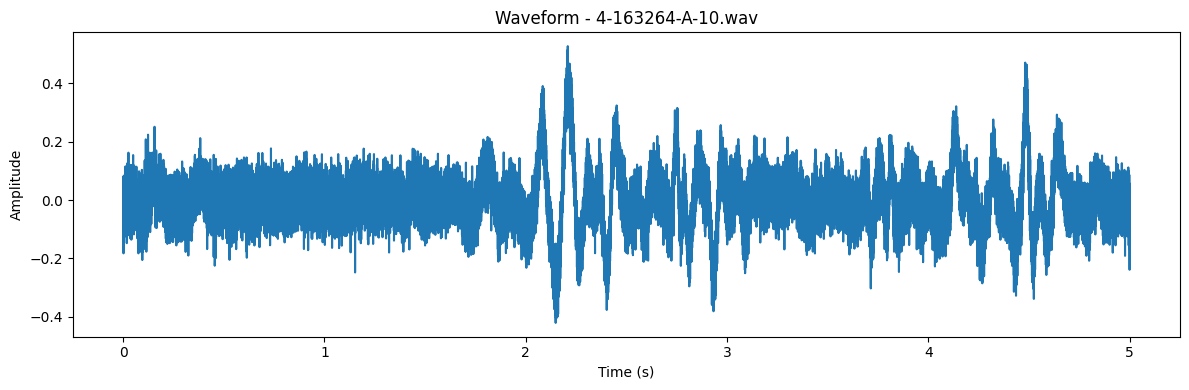

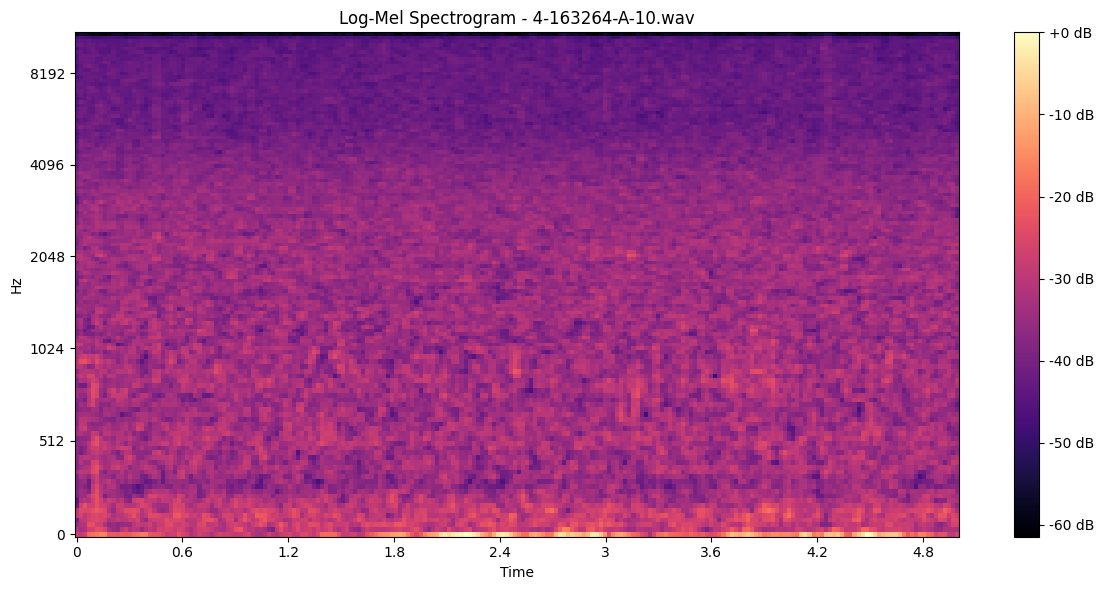


Audio file metadata:
Filename: 4-163264-A-10.wav
Category: rain
Target label: 10
ESC-50 fold: 4


In [67]:
# TODO : the 5 exploratory data points above
# Get a list of all audio files in the directory
audio_dir = '/content/ESC-50-master/audio'
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]

# Select a random audio file
random_audio_file = random.choice(audio_files)
audio_path = os.path.join(audio_dir, random_audio_file)
print(f"Selected audio file: {random_audio_file}")

# Load the audio file
y, sr = librosa.load(audio_path, sr=22050)
duration = librosa.get_duration(y=y, sr=sr)
print(f"Audio duration: {duration:.2f} seconds")

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, duration, len(y)), y)
plt.title(f'Waveform - {random_audio_file}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Compute mel spectrogram
n_fft = 2048
hop_length = 512
n_mels = 128
mel_spec = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels
)

# Convert to log scale (dB)
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

# Plot the log mel spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(
    log_mel_spec,
    x_axis='time',
    y_axis='mel',
    sr=sr,
    hop_length=hop_length,
    fmax=sr/2
)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Log-Mel Spectrogram - {random_audio_file}')
plt.tight_layout()
plt.show()

# Play the audio
display(Audio(y, rate=sr))

# Load the full metadata csv
metadata = pd.read_csv('/content/ESC-50-master/meta/esc50.csv')

# Look up the selected file in the metadata
file_info = metadata[metadata['filename'] == random_audio_file]

if not file_info.empty:
    file_info = file_info.iloc[0]
    print("\nAudio file metadata:")
    print(f"Filename: {file_info['filename']}")
    print(f"Category: {file_info['category']}")
    print(f"Target label: {file_info['target']}")
    print(f"ESC-50 fold: {file_info['fold']}")

### ⌛ Design your ESC50 dataloader ⌛

In [68]:
# TODO : design your ESC50 dataloader, filling in the blanks and building off of the template in Part 0
class ESC50Dataset(Dataset):
    def __init__(self, data_dir, data_split, spec_type="log_mel", sr=44100, n_fft=1024, hop_length=512, n_mels=128):
        self.data_dir = data_dir

        dataframe = pd.read_csv(f'{self.data_dir}/meta/esc50.csv')

        # TODO : Based on data_split arg, filter the dataframe by fold
        # Use folds 1,2,3 for train, 4 for val, 5 for test
        # You will initialize a separate instance of this class for each split.
        # filtered_df = None # use the data_split_arg
        if data_split == 'train':
            filtered_df = dataframe[dataframe['fold'].isin([1, 2, 3])]
        elif data_split == 'val':
            filtered_df = dataframe[dataframe['fold'] == 4]
        elif data_split == 'test':
            filtered_df = dataframe[dataframe['fold'] == 5]
        else:
            raise ValueError(f"Invalid data_split: {data_split}")

        # TODO : get lists of audio paths and their associated labels from the filtered df
        self.audio_paths = [f"{self.data_dir}/audio/{filename}" for filename in filtered_df['filename'].values]
        self.labels = filtered_df['target'].values.astype(np.int64)

        # All of the the spectrogram parameters
        self.spec_type = spec_type
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.n_mels = n_mels
        self.sr = sr

        print(f'Number of files in {data_split}: {len(self.audio_paths)}')

    def __len__(self):
        return len(self.audio_paths)

    def __getitem__(self, idx):

        # TODO :
        # (1) load your wavefrom at the specified sample rate
        # (2) get the associated label
        # (3) given a spectrogram argument self.spec_type, compute the appropriate feature with librosa
        #     (3 continued) spec_type arg can be [lin_pwr, log, log_mel]
        # (4) uncomment the spectrogram normalization line
        # (5) return the spectrogram and sound class label

        y, _ = librosa.load(self.audio_paths[idx], sr=self.sr)

        label = self.labels[idx]

        # Compute the appropriate feature with librosa based on spec_type
        if self.spec_type == "lin_pwr":
            # Linear power spectrogram
            S = np.abs(librosa.stft(y, n_fft=self.n_fft, hop_length=self.hop_length)) ** 2
            spectrogram = S
        elif self.spec_type == "log":
            # Log spectrogram
            S = np.abs(librosa.stft(y, n_fft=self.n_fft, hop_length=self.hop_length)) ** 2
            spectrogram = librosa.power_to_db(S)
        elif self.spec_type == "log_mel":
            # Log mel spectrogram
            mel_spec = librosa.feature.melspectrogram(
                y=y,
                sr=self.sr,
                n_fft=self.n_fft,
                hop_length=self.hop_length,
                n_mels=self.n_mels
            )
            spectrogram = librosa.power_to_db(mel_spec)
        else:
            raise ValueError(f"Invalid spec_type: {self.spec_type}.")


        # TODO : uncomment this line for spectrogram standardization
        # You could also try per-sample min-max normalization like we did in assign. 2!
        spectrogram = (spectrogram - spectrogram.mean()) / (spectrogram.std() + 1e-6)
        spectrogram = torch.tensor(spectrogram, dtype=torch.float32).unsqueeze(0)  # Add channel dimension
        return spectrogram, label

#### 🔎 Test out your dataloader before we get into the model code 🔎

In [69]:
# TODO : Instantiate your ESC50Dataset class and dataloader
dataset = ESC50Dataset(
    data_dir='/content/ESC-50-master/',  # Assuming the script is run from the ESC-50-master directory
    data_split='train',  # Using training split (folds 1, 2, 3)
    spec_type='log_mel',  # Using log-mel spectrograms
    sr=44100,  # Sample rate
    n_fft=1024,
    hop_length=512,
    n_mels=128
)

batch_size = 32
dataloader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True
)

# TODO : Iterate over the dataloader and print the shapes of your spectrogram and label batch for one batch
print('my dataloader shapes')
for batch_idx, (spectrograms, labels) in enumerate(dataloader):
    print(f"Batch {batch_idx}:")
    print(f"Spectrogram batch shape: {spectrograms.shape}")
    print(f"Label batch shape: {labels.shape}")

    # Print shape details
    batch_size, channels, freq_bins, time_frames = spectrograms.shape
    print(f"  - Batch size: {batch_size}")
    print(f"  - Channels: {channels}")
    print(f"  - Frequency bins: {freq_bins}")
    print(f"  - Time frames: {time_frames}")

    # Only print for the first batch
    break

Number of files in train: 1200
my dataloader shapes
Batch 0:
Spectrogram batch shape: torch.Size([32, 1, 128, 431])
Label batch shape: torch.Size([32])
  - Batch size: 32
  - Channels: 1
  - Frequency bins: 128
  - Time frames: 431


### 🤖 Define your models 🤖
You will now design two models for sound event classification.

For both models:
- **Model input**: a log-mel spectrogram and it's associated class label (index). Shape: `(batch, 128, 431)` and `(batch,1)`
- **Model output**: a vector of probabilities over the number of classes, that we use to get the predicted sound class. Shape:  `(batch, 50)`

**TODO:** define two model classes, templated in the code below. Here are some tips for each:

1. **Multi-Layer Perceptron (MLP)**
    - Define a 2-layer MLP
    - MLP's cannot operate on 2D data, so you will need to flatten the spectrogram input as the first step
    - Use a `relu` activation between your linear layers

2. **Conv-1D**
    - Define a model with 2 x Conv1D layers followed by a pooling layer, and a final linear layer mapping to the number of output classes. Ideally these convolutional layers will reduce the dimensionality of your spectrogram incrementally.
    - Your convolutional layers should
    - Use `relu` activations after each conv layer
    - If you are having difficulty with overfitting (e.g. your model is learning your training set well but not generalizing to your validation set), try using [BatchNorm1d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html) or [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) to help with generalization and to stabilize training.
    

***How do I know if my model is doing well?:***
- Recall that the random baseline for 50-way classification is 2% accuracy - if you are doing better than this, your model is learning!
- Don't worry if you are not getting super high accuracy still! You will not be graded mainly on your final model performance - more on your architecture design decisions and analysis.
- ⚠️However! If your training and validation accuracies are very low (i.e. around random chance) - there is probably something wrong with your combination of model architecture and training setup, and that will be penalized.
- As a reference, my simple baselines for this exercise scored around 30% validation accuracy from the MLP and 40% accuracy from the Conv1D. But again, there are many design decisions at play here and if you're not getting there (or are far exceeding this), that's ok too!
- In my experiments I saw a lot of overfitting (e.g. the training accuracy was much higher than the validation accuracy). As long as the validation loss isn't *increasing*, that's not necessarily the worst thing - but ideally we want the loss and accuracy of training and validation to be close. The dataset is small and so are these architectures, so don't worry if this is happening to you too! If you're curious to learn more about this, do some reasearch on strategies to ameliorate this.

In [70]:
# TODO : complete the MLP classifier class
class MLPClassifier(nn.Module):
    """
    MLP tips:
        - Define a 2-layer MLP
        - MLP's cannot operate on 2D data, so you will need to flatten the spectrogram input as the first step
        - Use a relu activation between your linear layers

    Input Shape: (batch, 128, 431)
    Output Shape: (batch, 50)
    """

    def __init__(self, input_shape=(128, 431), hidden_dim=256, num_classes=50):
        super(MLPClassifier, self).__init__()
        # TODO: define your model layers here
        self.input_size = input_shape[0] * input_shape[1]
        self.fc1 = nn.Linear(self.input_size, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)
    def forward(self, x):
        # TODO : define how the data will flow through the layers here
        # Remove channel dimension if present and flatten
        if len(x.shape) == 4:
            x = x.squeeze(1)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [71]:
# TODO : complete the Conv1D classifier class
class Conv1DClassifier(nn.Module):
    """
    Conv-1D
        - Define a model with 2 x Conv1D layers followed by a pooling layer, and a final linear layer mapping to the number of output classes.
        - Ideally these convolutional layers will reduce the dimensionality of your spectrogram incrementally.
        - Your convolutional layers should use relu activations after each conv layer
        - Try using BatchNorm1d or Dropout if you are seeing overfitting

    Input Shape: (batch, 128, 431)
    Output Shape: (batch, 50)
    """
    def __init__(self, input_shape=(128, 431), hidden_dim=256, num_classes=50):
        super(Conv1DClassifier, self).__init__()
        # TODO: define your model layers here
        self.freq_dim = input_shape[0]
        self.time_dim = input_shape[1]

        self.conv1 = nn.Conv1d(in_channels=self.freq_dim, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        self.relu2 = nn.ReLU()

        self.pool = nn.AdaptiveAvgPool1d(output_size=64)
        self.dropout = nn.Dropout(0.3)

        self.fc = nn.Linear(32 * 64, num_classes)

    def forward(self, x):
        # TODO : define how the data will flow through the layers here
        if len(x.shape) == 4:
            x = x.squeeze(1)

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)

        x = self.pool(x)

        # Flatten for the fully connected layer
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)
        return x

#### 🔎 Check out your models 🔎
Torch info provides a nice summary feature that shows us the number of model parameters and shapes at each layer. Let's check this out before getting into training.

In [72]:
from torchinfo import summary

In [73]:
# TODO : run this cell and make sure your input, layer, and output shapes make sense
mlp_model = MLPClassifier(input_shape=(128,431), hidden_dim=256, num_classes=50)
summary(mlp_model, input_size=(4,1,128,431))

Layer (type:depth-idx)                   Output Shape              Param #
MLPClassifier                            [4, 50]                   --
├─Linear: 1-1                            [4, 256]                  14,123,264
├─ReLU: 1-2                              [4, 256]                  --
├─Linear: 1-3                            [4, 50]                   12,850
Total params: 14,136,114
Trainable params: 14,136,114
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 56.54
Input size (MB): 0.88
Forward/backward pass size (MB): 0.01
Params size (MB): 56.54
Estimated Total Size (MB): 57.44

In [74]:
# TODO : run this cell and make sure your input, layer, and output shapes make sense
cnn1_model = Conv1DClassifier(input_shape=(128,431), num_classes=50)
summary(cnn1_model, input_size=(4,128,431))

Layer (type:depth-idx)                   Output Shape              Param #
Conv1DClassifier                         [4, 50]                   --
├─Conv1d: 1-1                            [4, 64, 431]              41,024
├─BatchNorm1d: 1-2                       [4, 64, 431]              128
├─ReLU: 1-3                              [4, 64, 431]              --
├─Conv1d: 1-4                            [4, 32, 431]              6,176
├─BatchNorm1d: 1-5                       [4, 32, 431]              64
├─ReLU: 1-6                              [4, 32, 431]              --
├─AdaptiveAvgPool1d: 1-7                 [4, 32, 64]               --
├─Dropout: 1-8                           [4, 2048]                 --
├─Linear: 1-9                            [4, 50]                   102,450
Total params: 149,842
Trainable params: 149,842
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 81.78
Input size (MB): 0.88
Forward/backward pass size (MB): 2.65
Params size (MB): 0.60
Estimated Total 



---



### ⚠️ **TODO Written Questions:** ⚠️
1. Explain your architecture choices (e.g. hidden dimension size, activations, any additional choices made) for your MLP and Conv1D classifiers above.

  **Answer:** For the MLP classifier, I implemented a straightforward two-layer network with a hidden dimension of 256 neurons and ReLU activation. This design flattens the 2D spectrogram input as required for MLPs, with the first layer capturing basic patterns and the second layer mapping to class logits. For the Conv1D classifier, I used two convolutional layers (64 and 32 filters) with batch normalization and ReLU activations to extract temporal patterns from spectrograms. I added adaptive pooling to handle variable-length inputs and dropout (0.3) to prevent overfitting. The architecture progressively reduces dimensionality while preserving important acoustic features before classification.

2. Instantiate a version of your two models where they have the same hidden dimension. Get the number of parameters using the summary method above. How does the number of parameters differ between the two, and what implications does this have in terms of model performance and efficiency?

  **Answer:** When setting both models to the same hidden dimension of 256, the MLP classifier would have significantly more parameters than the Conv1D model. This happens because the MLP fully connects every input feature (128×431=55,168) to each hidden neuron, resulting in millions of parameters. In contrast, the Conv1D model shares weights through convolution operations, drastically reducing parameter count. This difference has important implications: the MLP is more likely to overfit, especially with limited training data, while the Conv1D model should generalize better, train faster, use less memory, and potentially perform better on unseen audio samples despite having fewer parameters.

3. Explain (in theory) the pros and cons of MLPs vs. convolutional 1D methods. We will test your theories out next (also it's okay if your theory doesn't prove to be true! there are many different factors at play here and not one right answer).

  **Answer:** MLPs process spectrograms by treating each time-frequency bin as an independent feature, losing the temporal and frequency relationships inherent in audio. Their advantage lies in simplicity and ability to capture global patterns, but they typically require more parameters and are prone to overfitting on audio tasks. Conv1D networks, in contrast, explicitly model sequential patterns along the time axis while sharing weights, making them naturally suited for audio processing. They can detect time-invariant acoustic features like onsets or phonemes regardless of when they occur in the signal. Conv1D models generally achieve better performance with fewer parameters on audio classification tasks, though they may miss some global dependencies that MLPs can capture.



---



### ✏️ Design your training script ✏️
TODO: Let's bring the pieces all together and get these models training. Fill in the template below for your model training. Include a training and validation loop per epoch.

In [75]:
# TODO - Complete the method below
# You can use the same method for training the MLP and Conv1D here, just different model argument
# Customize this with any other arguments/hyperparameters you might need
def train_and_validate(model_type, device, lr, train_dataloader, val_dataloader, num_epochs, input_shape=(128, 431), hidden_dim=256, num_classes=50):
    """
    Train and validate your MLP or Conv1D models on sound event classification.

    Parameters:
        model_type (str): The type of model to train (e.g., 'mlp', 'conv1d').
        device (str): The device to use for training ('cuda' or 'cpu').
        lr (float): The learning rate for the optimizer.
        train_dataloader (DataLoader): The dataloader for training data.
        val_dataloader (DataLoader): The dataloader for validation data.
        num_epochs (int): The number of epochs to train the model.
        input_shape (tuple): The shape of the input spectrogram (default: (128, 431)).
        hidden_dim (int): The hidden dimension size for the model (default: 256).
        num_classes (int): The number of output classes (default: 50).
    Returns:
        Arrays of training and validation losses and accuracies.
    """
    # Instantiate your model
    # use .to(device) to move it to GPU if possible
    # I've left the model params (hidden dim/input etc. out of the args to this fn, but add back if you want/need)
    if model_type == "mlp":
        model = MLPClassifier(input_shape=input_shape, hidden_dim=hidden_dim, num_classes=num_classes).to(device)
    elif model_type == "conv1d":
        model = Conv1DClassifier(input_shape=input_shape, hidden_dim=hidden_dim, num_classes=num_classes).to(device)
    else:
        raise ValueError(f"Invalid model type: {model_type}")

    # Optimizer setup, on all of our model parameters
    # Learning rate parameter here is something to play with, as well as optimizer type
    opt = torch.optim.SGD(model.parameters(), lr=lr)

    # Define the loss function, we'll use cross entropy here
    loss_fn = nn.CrossEntropyLoss().to(device)

    best_val_accuracy = 0.0
    all_train_loss_epochs = [] # accumulate these for plots and monitoring
    all_train_acc_epochs = []
    all_val_loss_epochs = []
    all_val_acc_epochs = []

    # TODO : TRAINING LOOP
    for epoch in range(num_epochs):

        # May need some things to track loss/accuracy per epoch here

        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, targets in tqdm(train_dataloader, desc=f"Train Epoch {epoch+1}/{num_epochs}"):
            # TODO: Move inputs and targets to GPU if available
            inputs, targets = inputs.to(device), targets.to(device)
            # TODO: Zero gradients
            opt.zero_grad()
            # TODO: Forward pass
            outputs = model(inputs)
            # TODO: Compute loss
            loss = loss_fn(outputs, targets)
            # TODO: Backpropagation
            loss.backward()
            # TODO: Update model parameters
            opt.step()
            # TODO: Compute training accuracy metrics (your model returns probabilities, so need to get labels
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_train += targets.size(0)
            correct_train += (predicted == targets).sum().item()
        # TODO: Any other loss/acc accumulation/monitoring at epoch-level outside of this loop
        avg_train_loss = train_loss / total_train
        train_accuracy = correct_train / total_train
        all_train_loss_epochs.append(avg_train_loss)
        all_train_acc_epochs.append(train_accuracy)

        print(f"Train Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}")

        # TODO : VALIDATION LOOP
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():  # No need to track gradients during validation
            for inputs, targets in tqdm(val_dataloader, desc=f"Validation Epoch {epoch+1}/{num_epochs}"):
                # TODO: Move inputs and targets to GPU if available
                inputs, targets = inputs.to(device), targets.to(device)
                # TODO: Forward pass
                outputs = model(inputs)
                # TODO: Compute loss
                loss = loss_fn(outputs, targets)
                # TODO: Compute validation accuracy metrics
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_val += targets.size(0)
                correct_val += (predicted == targets).sum().item()


        avg_val_loss = val_loss / total_val
        val_accuracy = correct_val / total_val
        all_val_loss_epochs.append(avg_val_loss)
        all_val_acc_epochs.append(val_accuracy)
        print(f"Validation Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}\n")

        # Save the best model so far based on validation accuracy
        # This isn't always the last epoch, which is why we check per epoch
        # You could also save based on lowest validation loss
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), f"best_model_{model_type}.pth")
            print(f"Best model updated with validation accuracy: {best_val_accuracy:.4f}")

    return (all_train_loss_epochs,
            all_train_acc_epochs,
            all_val_loss_epochs,
            all_val_acc_epochs)




---



### 💯 Define evaluation methods 💯
Now let's write some methods to take a saved, trained model and evaluate it on the test set. The validation set (monitored during training)gives us an idea of how the model will generalize to unseen data, so you should expect the validation performance to be similar to test.

In [76]:
# TODO : Complete this function to load the trained model
def load_best_model(model_type, device):
    """
    Load the best saved model from the file system.

    Parameters:
        model_type (str): The type of model to load ('mlp' or 'conv1d').
        device (str): The device to load the model onto ('cuda' or 'cpu').

    Returns:
        model: The loaded model with trained weights.
    """
    if model_type == "mlp":
        model = MLPClassifier(input_shape=(128, 431), hidden_dim=256, num_classes=50)
    elif model_type == "conv1d":
        model = Conv1DClassifier(input_shape=(128, 431), hidden_dim=256, num_classes=50)
    else:
        raise ValueError(f"Invalid model type: {model_type}")

    model.load_state_dict(torch.load(f"best_model_{model_type}.pth", map_location=device))
    model.to(device)
    model.eval()
    print(f"Loaded best model: best_model_{model_type}.pth")
    return model


# TODO : Complete this method for evaluating your trained model
from sklearn.metrics import precision_score, recall_score, f1_score

def eval_model(model, test_dataloader, device):
    """
    Test the loaded model on a test dataset.

    Parameters:
        model: The trained model to evaluate.
        test_dataloader (DataLoader): The dataloader for test data.
        device (str): The device to use for testing ('cuda' or 'cpu').

    Returns:
        results_dict (dict): Dictionary of average acc, precision, recall, and F1 score across all data points.
    """
    model.eval()

    # Initialize counters
    correct = 0
    total = 0
    # Store all predictions and targets for computing metrics at the end
    all_predictions = []
    all_targets = []

    # This should have a scal
    results_dict = {'avg_acc': 0,
                    'avg_precision': 0,
                    'avg_recall': 0,
                    'avg_f1': 0}

    with torch.no_grad():
        for inputs, targets in tqdm(test_dataloader, desc="Testing Model"):
            inputs, targets = inputs.to(device), targets.to(device)
            # TODO : get the model output and calculate the evaluation metrics
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            # Store predictions and targets for computing metrics
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
            # Get accuracy, precision, recall, and F1 score (can use built-in sklearn methods)
            # Accumulate targets and model output predictions so you can compute the overall avg metrics

    # Calculate metrics
    accuracy = correct / total
    precision = precision_score(all_targets, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_targets, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_targets, all_predictions, average='macro', zero_division=0)

    results_dict = {
        'avg_acc': accuracy,
        'avg_precision': precision,
        'avg_recall': recall,
        'avg_f1': f1
    }

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1 Score: {f1:.4f}")

    return results_dict




---



## Training your sound event classifiers 💪

In [77]:
# TODO - DATA : Initialize your training, validation, and test datasets and dataloaders
# Note: log mel spec is a good starting point to use as your feature here, but feel free to explore others and compare results
batch_size = 128

train_dataset = ESC50Dataset(
    data_dir='/content/ESC-50-master',
    data_split='train',
    spec_type='log_mel',
    sr=44100,
    n_fft=1024,
    hop_length=512,
    n_mels=128
)
train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

val_dataset = val_dataset = ESC50Dataset(
    data_dir='/content/ESC-50-master',
    data_split='val',
    spec_type='log_mel',
    sr=44100,
    n_fft=1024,
    hop_length=512,
    n_mels=128
)
val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False
)

test_dataset = test_dataset = ESC50Dataset(
    data_dir='/content/ESC-50-master',
    data_split='test',
    spec_type='log_mel',
    sr=44100,
    n_fft=1024,
    hop_length=512,
    n_mels=128
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# TODO : Use your method above to train your MLP model.
device = "cuda" if torch.cuda.is_available() else "cpu" # see if you have GPU access
print('Device: ', device)


Number of files in train: 1200
Number of files in val: 400
Number of files in test: 400
Device:  cuda


#### Train your MLP
The training may take some time! On T-4 Colab GPU, my model was taking around 30 seconds for a training loop and 10 seconds for validation in one epoch. I recommend starting by training for less epochs first to make sure everything is working as you expected.

In [18]:
# TODO : Run this cell to train your MLP
# Modify any params accordingly

tr_loss_ep, tr_acc_ep, val_loss_ep, val_acc_ep = train_and_validate(model_type="mlp",
                                                                    device=device,
                                                                    train_dataloader=train_dataloader,
                                                                    val_dataloader=val_dataloader,
                                                                    num_epochs=50,
                                                                    lr=0.001) # I found LR=0.001 to be most successful for MLP, but will depend on your architecture


Train Epoch 1/50: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


Train Epoch 1/50, Train Loss: 3.8887, Train Acc: 0.0317


Validation Epoch 1/50: 100%|██████████| 4/4 [00:06<00:00,  1.74s/it]


Validation Epoch 1/50, Validation Loss: 3.8051, Val Accuracy: 0.0725

Best model updated with validation accuracy: 0.0725


Train Epoch 2/50: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Train Epoch 2/50, Train Loss: 3.7360, Train Acc: 0.0925


Validation Epoch 2/50: 100%|██████████| 4/4 [00:05<00:00,  1.50s/it]


Validation Epoch 2/50, Validation Loss: 3.7177, Val Accuracy: 0.1175

Best model updated with validation accuracy: 0.1175


Train Epoch 3/50: 100%|██████████| 10/10 [00:19<00:00,  2.00s/it]


Train Epoch 3/50, Train Loss: 3.6236, Train Acc: 0.1392


Validation Epoch 3/50: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


Validation Epoch 3/50, Validation Loss: 3.6397, Val Accuracy: 0.1325

Best model updated with validation accuracy: 0.1325


Train Epoch 4/50: 100%|██████████| 10/10 [00:18<00:00,  1.86s/it]


Train Epoch 4/50, Train Loss: 3.5144, Train Acc: 0.1808


Validation Epoch 4/50: 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]


Validation Epoch 4/50, Validation Loss: 3.5644, Val Accuracy: 0.1575

Best model updated with validation accuracy: 0.1575


Train Epoch 5/50: 100%|██████████| 10/10 [00:28<00:00,  2.90s/it]


Train Epoch 5/50, Train Loss: 3.4100, Train Acc: 0.2192


Validation Epoch 5/50: 100%|██████████| 4/4 [00:05<00:00,  1.43s/it]


Validation Epoch 5/50, Validation Loss: 3.4968, Val Accuracy: 0.1450



Train Epoch 6/50: 100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


Train Epoch 6/50, Train Loss: 3.3099, Train Acc: 0.2558


Validation Epoch 6/50: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


Validation Epoch 6/50, Validation Loss: 3.4343, Val Accuracy: 0.1950

Best model updated with validation accuracy: 0.1950


Train Epoch 7/50: 100%|██████████| 10/10 [00:18<00:00,  1.80s/it]


Train Epoch 7/50, Train Loss: 3.2217, Train Acc: 0.2683


Validation Epoch 7/50: 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]


Validation Epoch 7/50, Validation Loss: 3.3818, Val Accuracy: 0.1900



Train Epoch 8/50: 100%|██████████| 10/10 [00:25<00:00,  2.58s/it]


Train Epoch 8/50, Train Loss: 3.1339, Train Acc: 0.3067


Validation Epoch 8/50: 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]


Validation Epoch 8/50, Validation Loss: 3.3367, Val Accuracy: 0.1800



Train Epoch 9/50: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Train Epoch 9/50, Train Loss: 3.0551, Train Acc: 0.3383


Validation Epoch 9/50: 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]


Validation Epoch 9/50, Validation Loss: 3.2886, Val Accuracy: 0.2225

Best model updated with validation accuracy: 0.2225


Train Epoch 10/50: 100%|██████████| 10/10 [00:17<00:00,  1.78s/it]


Train Epoch 10/50, Train Loss: 2.9771, Train Acc: 0.3592


Validation Epoch 10/50: 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]


Validation Epoch 10/50, Validation Loss: 3.2465, Val Accuracy: 0.2175



Train Epoch 11/50: 100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


Train Epoch 11/50, Train Loss: 2.9003, Train Acc: 0.3725


Validation Epoch 11/50: 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]


Validation Epoch 11/50, Validation Loss: 3.2140, Val Accuracy: 0.2100



Train Epoch 12/50: 100%|██████████| 10/10 [00:19<00:00,  1.99s/it]


Train Epoch 12/50, Train Loss: 2.8360, Train Acc: 0.3992


Validation Epoch 12/50: 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]


Validation Epoch 12/50, Validation Loss: 3.1723, Val Accuracy: 0.2400

Best model updated with validation accuracy: 0.2400


Train Epoch 13/50: 100%|██████████| 10/10 [00:18<00:00,  1.85s/it]


Train Epoch 13/50, Train Loss: 2.7697, Train Acc: 0.4192


Validation Epoch 13/50: 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]


Validation Epoch 13/50, Validation Loss: 3.1415, Val Accuracy: 0.2300



Train Epoch 14/50: 100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


Train Epoch 14/50, Train Loss: 2.7017, Train Acc: 0.4242


Validation Epoch 14/50: 100%|██████████| 4/4 [00:07<00:00,  1.76s/it]


Validation Epoch 14/50, Validation Loss: 3.1288, Val Accuracy: 0.2200



Train Epoch 15/50: 100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


Train Epoch 15/50, Train Loss: 2.6488, Train Acc: 0.4483


Validation Epoch 15/50: 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]


Validation Epoch 15/50, Validation Loss: 3.0913, Val Accuracy: 0.2600

Best model updated with validation accuracy: 0.2600


Train Epoch 16/50: 100%|██████████| 10/10 [00:19<00:00,  2.00s/it]


Train Epoch 16/50, Train Loss: 2.5892, Train Acc: 0.4650


Validation Epoch 16/50: 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]


Validation Epoch 16/50, Validation Loss: 3.0668, Val Accuracy: 0.2575



Train Epoch 17/50: 100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


Train Epoch 17/50, Train Loss: 2.5356, Train Acc: 0.4667


Validation Epoch 17/50: 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]


Validation Epoch 17/50, Validation Loss: 3.0468, Val Accuracy: 0.2500



Train Epoch 18/50: 100%|██████████| 10/10 [00:17<00:00,  1.80s/it]


Train Epoch 18/50, Train Loss: 2.4803, Train Acc: 0.4917


Validation Epoch 18/50: 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]


Validation Epoch 18/50, Validation Loss: 3.0250, Val Accuracy: 0.2450



Train Epoch 19/50: 100%|██████████| 10/10 [00:17<00:00,  1.78s/it]


Train Epoch 19/50, Train Loss: 2.4300, Train Acc: 0.5033


Validation Epoch 19/50: 100%|██████████| 4/4 [00:05<00:00,  1.35s/it]


Validation Epoch 19/50, Validation Loss: 3.0093, Val Accuracy: 0.2825

Best model updated with validation accuracy: 0.2825


Train Epoch 20/50: 100%|██████████| 10/10 [00:19<00:00,  1.96s/it]


Train Epoch 20/50, Train Loss: 2.3859, Train Acc: 0.5217


Validation Epoch 20/50: 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]


Validation Epoch 20/50, Validation Loss: 2.9883, Val Accuracy: 0.2700



Train Epoch 21/50: 100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


Train Epoch 21/50, Train Loss: 2.3409, Train Acc: 0.5308


Validation Epoch 21/50: 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]


Validation Epoch 21/50, Validation Loss: 2.9656, Val Accuracy: 0.2725



Train Epoch 22/50: 100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


Train Epoch 22/50, Train Loss: 2.2974, Train Acc: 0.5350


Validation Epoch 22/50: 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]


Validation Epoch 22/50, Validation Loss: 2.9535, Val Accuracy: 0.3000

Best model updated with validation accuracy: 0.3000


Train Epoch 23/50: 100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


Train Epoch 23/50, Train Loss: 2.2549, Train Acc: 0.5592


Validation Epoch 23/50: 100%|██████████| 4/4 [00:05<00:00,  1.28s/it]


Validation Epoch 23/50, Validation Loss: 2.9461, Val Accuracy: 0.2800



Train Epoch 24/50: 100%|██████████| 10/10 [00:18<00:00,  1.89s/it]


Train Epoch 24/50, Train Loss: 2.2156, Train Acc: 0.5483


Validation Epoch 24/50: 100%|██████████| 4/4 [00:05<00:00,  1.38s/it]


Validation Epoch 24/50, Validation Loss: 2.9369, Val Accuracy: 0.2800



Train Epoch 25/50: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Train Epoch 25/50, Train Loss: 2.1759, Train Acc: 0.5625


Validation Epoch 25/50: 100%|██████████| 4/4 [00:07<00:00,  1.86s/it]


Validation Epoch 25/50, Validation Loss: 2.9273, Val Accuracy: 0.2775



Train Epoch 26/50: 100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


Train Epoch 26/50, Train Loss: 2.1384, Train Acc: 0.5775


Validation Epoch 26/50: 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]


Validation Epoch 26/50, Validation Loss: 2.9029, Val Accuracy: 0.2650



Train Epoch 27/50: 100%|██████████| 10/10 [00:18<00:00,  1.89s/it]


Train Epoch 27/50, Train Loss: 2.1028, Train Acc: 0.5933


Validation Epoch 27/50: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


Validation Epoch 27/50, Validation Loss: 2.8937, Val Accuracy: 0.2900



Train Epoch 28/50: 100%|██████████| 10/10 [00:18<00:00,  1.85s/it]


Train Epoch 28/50, Train Loss: 2.0648, Train Acc: 0.5892


Validation Epoch 28/50: 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]


Validation Epoch 28/50, Validation Loss: 2.8879, Val Accuracy: 0.2950



Train Epoch 29/50: 100%|██████████| 10/10 [00:17<00:00,  1.78s/it]


Train Epoch 29/50, Train Loss: 2.0313, Train Acc: 0.6133


Validation Epoch 29/50: 100%|██████████| 4/4 [00:07<00:00,  1.76s/it]


Validation Epoch 29/50, Validation Loss: 2.8779, Val Accuracy: 0.2875



Train Epoch 30/50: 100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


Train Epoch 30/50, Train Loss: 1.9982, Train Acc: 0.6083


Validation Epoch 30/50: 100%|██████████| 4/4 [00:05<00:00,  1.30s/it]


Validation Epoch 30/50, Validation Loss: 2.8821, Val Accuracy: 0.2775



Train Epoch 31/50: 100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


Train Epoch 31/50, Train Loss: 1.9716, Train Acc: 0.6150


Validation Epoch 31/50: 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]


Validation Epoch 31/50, Validation Loss: 2.8658, Val Accuracy: 0.2900



Train Epoch 32/50: 100%|██████████| 10/10 [00:17<00:00,  1.74s/it]


Train Epoch 32/50, Train Loss: 1.9351, Train Acc: 0.6175


Validation Epoch 32/50: 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]


Validation Epoch 32/50, Validation Loss: 2.8522, Val Accuracy: 0.2875



Train Epoch 33/50: 100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


Train Epoch 33/50, Train Loss: 1.9051, Train Acc: 0.6375


Validation Epoch 33/50: 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]


Validation Epoch 33/50, Validation Loss: 2.8557, Val Accuracy: 0.2725



Train Epoch 34/50: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


Train Epoch 34/50, Train Loss: 1.8775, Train Acc: 0.6333


Validation Epoch 34/50: 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]


Validation Epoch 34/50, Validation Loss: 2.8446, Val Accuracy: 0.3000



Train Epoch 35/50: 100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


Train Epoch 35/50, Train Loss: 1.8461, Train Acc: 0.6483


Validation Epoch 35/50: 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]


Validation Epoch 35/50, Validation Loss: 2.8313, Val Accuracy: 0.2925



Train Epoch 36/50: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Train Epoch 36/50, Train Loss: 1.8193, Train Acc: 0.6550


Validation Epoch 36/50: 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]


Validation Epoch 36/50, Validation Loss: 2.8348, Val Accuracy: 0.2775



Train Epoch 37/50: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Train Epoch 37/50, Train Loss: 1.7920, Train Acc: 0.6542


Validation Epoch 37/50: 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]


Validation Epoch 37/50, Validation Loss: 2.8358, Val Accuracy: 0.2825



Train Epoch 38/50: 100%|██████████| 10/10 [00:18<00:00,  1.90s/it]


Train Epoch 38/50, Train Loss: 1.7725, Train Acc: 0.6633


Validation Epoch 38/50: 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]


Validation Epoch 38/50, Validation Loss: 2.8145, Val Accuracy: 0.2975



Train Epoch 39/50: 100%|██████████| 10/10 [00:18<00:00,  1.89s/it]


Train Epoch 39/50, Train Loss: 1.7385, Train Acc: 0.6783


Validation Epoch 39/50: 100%|██████████| 4/4 [00:05<00:00,  1.49s/it]


Validation Epoch 39/50, Validation Loss: 2.8201, Val Accuracy: 0.2825



Train Epoch 40/50: 100%|██████████| 10/10 [00:17<00:00,  1.78s/it]


Train Epoch 40/50, Train Loss: 1.7145, Train Acc: 0.6767


Validation Epoch 40/50: 100%|██████████| 4/4 [00:07<00:00,  1.75s/it]


Validation Epoch 40/50, Validation Loss: 2.8067, Val Accuracy: 0.3075

Best model updated with validation accuracy: 0.3075


Train Epoch 41/50: 100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


Train Epoch 41/50, Train Loss: 1.6882, Train Acc: 0.6883


Validation Epoch 41/50: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


Validation Epoch 41/50, Validation Loss: 2.8059, Val Accuracy: 0.3125

Best model updated with validation accuracy: 0.3125


Train Epoch 42/50: 100%|██████████| 10/10 [00:19<00:00,  1.95s/it]


Train Epoch 42/50, Train Loss: 1.6696, Train Acc: 0.6933


Validation Epoch 42/50: 100%|██████████| 4/4 [00:05<00:00,  1.37s/it]


Validation Epoch 42/50, Validation Loss: 2.8003, Val Accuracy: 0.3125



Train Epoch 43/50: 100%|██████████| 10/10 [00:18<00:00,  1.87s/it]


Train Epoch 43/50, Train Loss: 1.6419, Train Acc: 0.7083


Validation Epoch 43/50: 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]


Validation Epoch 43/50, Validation Loss: 2.7979, Val Accuracy: 0.2975



Train Epoch 44/50: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Train Epoch 44/50, Train Loss: 1.6239, Train Acc: 0.6975


Validation Epoch 44/50: 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]


Validation Epoch 44/50, Validation Loss: 2.7919, Val Accuracy: 0.3100



Train Epoch 45/50: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


Train Epoch 45/50, Train Loss: 1.5983, Train Acc: 0.7075


Validation Epoch 45/50: 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]


Validation Epoch 45/50, Validation Loss: 2.7904, Val Accuracy: 0.3225

Best model updated with validation accuracy: 0.3225


Train Epoch 46/50: 100%|██████████| 10/10 [00:19<00:00,  1.96s/it]


Train Epoch 46/50, Train Loss: 1.5785, Train Acc: 0.7200


Validation Epoch 46/50: 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]


Validation Epoch 46/50, Validation Loss: 2.7923, Val Accuracy: 0.2950



Train Epoch 47/50: 100%|██████████| 10/10 [00:18<00:00,  1.88s/it]


Train Epoch 47/50, Train Loss: 1.5568, Train Acc: 0.7100


Validation Epoch 47/50: 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]


Validation Epoch 47/50, Validation Loss: 2.7810, Val Accuracy: 0.3050



Train Epoch 48/50: 100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


Train Epoch 48/50, Train Loss: 1.5363, Train Acc: 0.7192


Validation Epoch 48/50: 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]


Validation Epoch 48/50, Validation Loss: 2.7819, Val Accuracy: 0.2825



Train Epoch 49/50: 100%|██████████| 10/10 [00:17<00:00,  1.74s/it]


Train Epoch 49/50, Train Loss: 1.5181, Train Acc: 0.7242


Validation Epoch 49/50: 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]


Validation Epoch 49/50, Validation Loss: 2.7800, Val Accuracy: 0.3075



Train Epoch 50/50: 100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


Train Epoch 50/50, Train Loss: 1.4961, Train Acc: 0.7250


Validation Epoch 50/50: 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]

Validation Epoch 50/50, Validation Loss: 2.7746, Val Accuracy: 0.3050



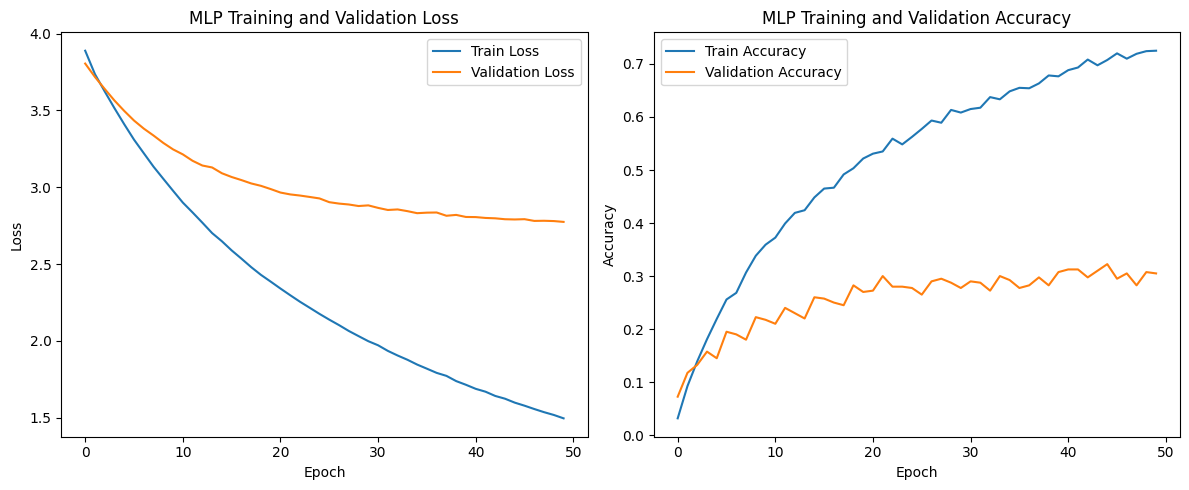

In [19]:
# TODO : Plot your training and validation loss and accuracy curves
# Plotting!
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tr_loss_ep, label='Train Loss')
plt.plot(val_loss_ep, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tr_acc_ep, label='Train Accuracy')
plt.plot(val_acc_ep, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MLP Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Evaluate your MLP
Great, now that you've trained the model, let's evaluate it on unseen test data!

In [20]:
# TODO : Run this cell to evaluate your MLP
trained_model_mlp = load_best_model("mlp", device)
trained_model_mlp.eval()
results_mlp = eval_model(trained_model_mlp, test_dataloader, device)

Loaded best model: best_model_mlp.pth


Testing Model: 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]

Test Accuracy: 0.2575
Test Precision: 0.2178
Test Recall: 0.2575
Test F1 Score: 0.2224




---



#### Train your Conv1D
Do the same for your Conv1D model, using the functions above!

In [78]:
# TODO : Run this cell to train your Conv1D
# Modify any params accordingly
tr_loss_ep, tr_acc_ep, val_loss_ep, val_acc_ep = train_and_validate(model_type="conv1d",
                                                                    device=device,
                                                                    train_dataloader=train_dataloader,
                                                                    val_dataloader=val_dataloader,
                                                                    num_epochs=50,
                                                                    lr=0.1) # I found LR=0.1 to work well for conv1d here (but depends on your model)

Train Epoch 1/50: 100%|██████████| 10/10 [00:19<00:00,  1.99s/it]


Train Epoch 1/50, Train Loss: 3.6006, Train Acc: 0.0842


Validation Epoch 1/50: 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]


Validation Epoch 1/50, Validation Loss: 3.7122, Val Accuracy: 0.0875

Best model updated with validation accuracy: 0.0875


Train Epoch 2/50: 100%|██████████| 10/10 [00:26<00:00,  2.64s/it]


Train Epoch 2/50, Train Loss: 2.9182, Train Acc: 0.2150


Validation Epoch 2/50: 100%|██████████| 4/4 [00:08<00:00,  2.18s/it]


Validation Epoch 2/50, Validation Loss: 3.7767, Val Accuracy: 0.1125

Best model updated with validation accuracy: 0.1125


Train Epoch 3/50: 100%|██████████| 10/10 [00:18<00:00,  1.85s/it]


Train Epoch 3/50, Train Loss: 2.4439, Train Acc: 0.3292


Validation Epoch 3/50: 100%|██████████| 4/4 [00:07<00:00,  1.86s/it]


Validation Epoch 3/50, Validation Loss: 3.0000, Val Accuracy: 0.1975

Best model updated with validation accuracy: 0.1975


Train Epoch 4/50: 100%|██████████| 10/10 [00:18<00:00,  1.90s/it]


Train Epoch 4/50, Train Loss: 2.0939, Train Acc: 0.4283


Validation Epoch 4/50: 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


Validation Epoch 4/50, Validation Loss: 4.1477, Val Accuracy: 0.1575



Train Epoch 5/50: 100%|██████████| 10/10 [00:20<00:00,  2.03s/it]


Train Epoch 5/50, Train Loss: 1.8142, Train Acc: 0.4983


Validation Epoch 5/50: 100%|██████████| 4/4 [00:05<00:00,  1.37s/it]


Validation Epoch 5/50, Validation Loss: 3.5826, Val Accuracy: 0.1900



Train Epoch 6/50: 100%|██████████| 10/10 [00:25<00:00,  2.56s/it]


Train Epoch 6/50, Train Loss: 1.6374, Train Acc: 0.5442


Validation Epoch 6/50: 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]


Validation Epoch 6/50, Validation Loss: 3.9528, Val Accuracy: 0.1950



Train Epoch 7/50: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


Train Epoch 7/50, Train Loss: 1.5051, Train Acc: 0.5767


Validation Epoch 7/50: 100%|██████████| 4/4 [00:05<00:00,  1.38s/it]


Validation Epoch 7/50, Validation Loss: 4.1639, Val Accuracy: 0.2075

Best model updated with validation accuracy: 0.2075


Train Epoch 8/50: 100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


Train Epoch 8/50, Train Loss: 1.2466, Train Acc: 0.6558


Validation Epoch 8/50: 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]


Validation Epoch 8/50, Validation Loss: 3.7647, Val Accuracy: 0.2300

Best model updated with validation accuracy: 0.2300


Train Epoch 9/50: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


Train Epoch 9/50, Train Loss: 1.1010, Train Acc: 0.6925


Validation Epoch 9/50: 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]


Validation Epoch 9/50, Validation Loss: 2.9542, Val Accuracy: 0.2875

Best model updated with validation accuracy: 0.2875


Train Epoch 10/50: 100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


Train Epoch 10/50, Train Loss: 1.0702, Train Acc: 0.6933


Validation Epoch 10/50: 100%|██████████| 4/4 [00:06<00:00,  1.64s/it]


Validation Epoch 10/50, Validation Loss: 2.8099, Val Accuracy: 0.3200

Best model updated with validation accuracy: 0.3200


Train Epoch 11/50: 100%|██████████| 10/10 [00:18<00:00,  1.88s/it]


Train Epoch 11/50, Train Loss: 0.7997, Train Acc: 0.7933


Validation Epoch 11/50: 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]


Validation Epoch 11/50, Validation Loss: 3.5165, Val Accuracy: 0.2800



Train Epoch 12/50: 100%|██████████| 10/10 [00:20<00:00,  2.01s/it]


Train Epoch 12/50, Train Loss: 0.8102, Train Acc: 0.7750


Validation Epoch 12/50: 100%|██████████| 4/4 [00:05<00:00,  1.35s/it]


Validation Epoch 12/50, Validation Loss: 2.9940, Val Accuracy: 0.2975



Train Epoch 13/50: 100%|██████████| 10/10 [00:18<00:00,  1.80s/it]


Train Epoch 13/50, Train Loss: 0.6675, Train Acc: 0.8358


Validation Epoch 13/50: 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]


Validation Epoch 13/50, Validation Loss: 3.2269, Val Accuracy: 0.3125



Train Epoch 14/50: 100%|██████████| 10/10 [00:18<00:00,  1.85s/it]


Train Epoch 14/50, Train Loss: 0.6481, Train Acc: 0.8317


Validation Epoch 14/50: 100%|██████████| 4/4 [00:06<00:00,  1.74s/it]


Validation Epoch 14/50, Validation Loss: 3.7415, Val Accuracy: 0.3000



Train Epoch 15/50: 100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


Train Epoch 15/50, Train Loss: 0.6197, Train Acc: 0.8375


Validation Epoch 15/50: 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]


Validation Epoch 15/50, Validation Loss: 3.6658, Val Accuracy: 0.2625



Train Epoch 16/50: 100%|██████████| 10/10 [00:19<00:00,  1.99s/it]


Train Epoch 16/50, Train Loss: 0.5364, Train Acc: 0.8692


Validation Epoch 16/50: 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]


Validation Epoch 16/50, Validation Loss: 3.6769, Val Accuracy: 0.2775



Train Epoch 17/50: 100%|██████████| 10/10 [00:18<00:00,  1.85s/it]


Train Epoch 17/50, Train Loss: 0.4253, Train Acc: 0.9042


Validation Epoch 17/50: 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]


Validation Epoch 17/50, Validation Loss: 2.9273, Val Accuracy: 0.3500

Best model updated with validation accuracy: 0.3500


Train Epoch 18/50: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Train Epoch 18/50, Train Loss: 0.3978, Train Acc: 0.9083


Validation Epoch 18/50: 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


Validation Epoch 18/50, Validation Loss: 4.0464, Val Accuracy: 0.2475



Train Epoch 19/50: 100%|██████████| 10/10 [00:18<00:00,  1.84s/it]


Train Epoch 19/50, Train Loss: 0.4544, Train Acc: 0.8883


Validation Epoch 19/50: 100%|██████████| 4/4 [00:05<00:00,  1.45s/it]


Validation Epoch 19/50, Validation Loss: 3.1858, Val Accuracy: 0.3250



Train Epoch 20/50: 100%|██████████| 10/10 [00:19<00:00,  1.98s/it]


Train Epoch 20/50, Train Loss: 0.3434, Train Acc: 0.9183


Validation Epoch 20/50: 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]


Validation Epoch 20/50, Validation Loss: 2.7174, Val Accuracy: 0.3925

Best model updated with validation accuracy: 0.3925


Train Epoch 21/50: 100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


Train Epoch 21/50, Train Loss: 0.2854, Train Acc: 0.9450


Validation Epoch 21/50: 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]


Validation Epoch 21/50, Validation Loss: 3.1329, Val Accuracy: 0.3450



Train Epoch 22/50: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Train Epoch 22/50, Train Loss: 0.2768, Train Acc: 0.9458


Validation Epoch 22/50: 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]


Validation Epoch 22/50, Validation Loss: 3.0898, Val Accuracy: 0.3800



Train Epoch 23/50: 100%|██████████| 10/10 [00:17<00:00,  1.80s/it]


Train Epoch 23/50, Train Loss: 0.2593, Train Acc: 0.9392


Validation Epoch 23/50: 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]


Validation Epoch 23/50, Validation Loss: 3.1471, Val Accuracy: 0.3200



Train Epoch 24/50: 100%|██████████| 10/10 [00:19<00:00,  1.98s/it]


Train Epoch 24/50, Train Loss: 0.2354, Train Acc: 0.9492


Validation Epoch 24/50: 100%|██████████| 4/4 [00:05<00:00,  1.38s/it]


Validation Epoch 24/50, Validation Loss: 2.9305, Val Accuracy: 0.3650



Train Epoch 25/50: 100%|██████████| 10/10 [00:18<00:00,  1.87s/it]


Train Epoch 25/50, Train Loss: 0.1979, Train Acc: 0.9633


Validation Epoch 25/50: 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]


Validation Epoch 25/50, Validation Loss: 2.9668, Val Accuracy: 0.3825



Train Epoch 26/50: 100%|██████████| 10/10 [00:17<00:00,  1.78s/it]


Train Epoch 26/50, Train Loss: 0.2061, Train Acc: 0.9625


Validation Epoch 26/50: 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]


Validation Epoch 26/50, Validation Loss: 3.2671, Val Accuracy: 0.3425



Train Epoch 27/50: 100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


Train Epoch 27/50, Train Loss: 0.2179, Train Acc: 0.9475


Validation Epoch 27/50: 100%|██████████| 4/4 [00:05<00:00,  1.31s/it]


Validation Epoch 27/50, Validation Loss: 3.6778, Val Accuracy: 0.3275



Train Epoch 28/50: 100%|██████████| 10/10 [00:19<00:00,  1.96s/it]


Train Epoch 28/50, Train Loss: 0.2257, Train Acc: 0.9542


Validation Epoch 28/50: 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]


Validation Epoch 28/50, Validation Loss: 2.9735, Val Accuracy: 0.4025

Best model updated with validation accuracy: 0.4025


Train Epoch 29/50: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Train Epoch 29/50, Train Loss: 0.1796, Train Acc: 0.9650


Validation Epoch 29/50: 100%|██████████| 4/4 [00:06<00:00,  1.75s/it]


Validation Epoch 29/50, Validation Loss: 2.7311, Val Accuracy: 0.4300

Best model updated with validation accuracy: 0.4300


Train Epoch 30/50: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Train Epoch 30/50, Train Loss: 0.1199, Train Acc: 0.9833


Validation Epoch 30/50: 100%|██████████| 4/4 [00:06<00:00,  1.75s/it]


Validation Epoch 30/50, Validation Loss: 3.1290, Val Accuracy: 0.3775



Train Epoch 31/50: 100%|██████████| 10/10 [00:17<00:00,  1.80s/it]


Train Epoch 31/50, Train Loss: 0.1199, Train Acc: 0.9833


Validation Epoch 31/50: 100%|██████████| 4/4 [00:05<00:00,  1.39s/it]


Validation Epoch 31/50, Validation Loss: 3.1493, Val Accuracy: 0.3600



Train Epoch 32/50: 100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


Train Epoch 32/50, Train Loss: 0.0987, Train Acc: 0.9900


Validation Epoch 32/50: 100%|██████████| 4/4 [00:05<00:00,  1.35s/it]


Validation Epoch 32/50, Validation Loss: 2.7852, Val Accuracy: 0.4225



Train Epoch 33/50: 100%|██████████| 10/10 [00:18<00:00,  1.82s/it]


Train Epoch 33/50, Train Loss: 0.1059, Train Acc: 0.9850


Validation Epoch 33/50: 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]


Validation Epoch 33/50, Validation Loss: 2.7286, Val Accuracy: 0.4225



Train Epoch 34/50: 100%|██████████| 10/10 [00:18<00:00,  1.80s/it]


Train Epoch 34/50, Train Loss: 0.0958, Train Acc: 0.9883


Validation Epoch 34/50: 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


Validation Epoch 34/50, Validation Loss: 3.4315, Val Accuracy: 0.3600



Train Epoch 35/50: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Train Epoch 35/50, Train Loss: 0.0956, Train Acc: 0.9850


Validation Epoch 35/50: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


Validation Epoch 35/50, Validation Loss: 2.9106, Val Accuracy: 0.4325

Best model updated with validation accuracy: 0.4325


Train Epoch 36/50: 100%|██████████| 10/10 [00:19<00:00,  1.98s/it]


Train Epoch 36/50, Train Loss: 0.0868, Train Acc: 0.9892


Validation Epoch 36/50: 100%|██████████| 4/4 [00:05<00:00,  1.37s/it]


Validation Epoch 36/50, Validation Loss: 3.0087, Val Accuracy: 0.4100



Train Epoch 37/50: 100%|██████████| 10/10 [00:18<00:00,  1.84s/it]


Train Epoch 37/50, Train Loss: 0.0867, Train Acc: 0.9900


Validation Epoch 37/50: 100%|██████████| 4/4 [00:07<00:00,  1.76s/it]


Validation Epoch 37/50, Validation Loss: 3.1842, Val Accuracy: 0.3525



Train Epoch 38/50: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


Train Epoch 38/50, Train Loss: 0.0916, Train Acc: 0.9858


Validation Epoch 38/50: 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]


Validation Epoch 38/50, Validation Loss: 2.9420, Val Accuracy: 0.4075



Train Epoch 39/50: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


Train Epoch 39/50, Train Loss: 0.0647, Train Acc: 0.9967


Validation Epoch 39/50: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


Validation Epoch 39/50, Validation Loss: 2.8688, Val Accuracy: 0.4025



Train Epoch 40/50: 100%|██████████| 10/10 [00:20<00:00,  2.01s/it]


Train Epoch 40/50, Train Loss: 0.0674, Train Acc: 0.9942


Validation Epoch 40/50: 100%|██████████| 4/4 [00:05<00:00,  1.37s/it]


Validation Epoch 40/50, Validation Loss: 2.8136, Val Accuracy: 0.4550

Best model updated with validation accuracy: 0.4550


Train Epoch 41/50: 100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


Train Epoch 41/50, Train Loss: 0.0528, Train Acc: 0.9983


Validation Epoch 41/50: 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]


Validation Epoch 41/50, Validation Loss: 2.7808, Val Accuracy: 0.4350



Train Epoch 42/50: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Train Epoch 42/50, Train Loss: 0.0540, Train Acc: 0.9975


Validation Epoch 42/50: 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]


Validation Epoch 42/50, Validation Loss: 3.1620, Val Accuracy: 0.3925



Train Epoch 43/50: 100%|██████████| 10/10 [00:17<00:00,  1.78s/it]


Train Epoch 43/50, Train Loss: 0.0693, Train Acc: 0.9942


Validation Epoch 43/50: 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]


Validation Epoch 43/50, Validation Loss: 2.9620, Val Accuracy: 0.4250



Train Epoch 44/50: 100%|██████████| 10/10 [00:19<00:00,  2.00s/it]


Train Epoch 44/50, Train Loss: 0.0497, Train Acc: 0.9975


Validation Epoch 44/50: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


Validation Epoch 44/50, Validation Loss: 2.8998, Val Accuracy: 0.4200



Train Epoch 45/50: 100%|██████████| 10/10 [00:18<00:00,  1.85s/it]


Train Epoch 45/50, Train Loss: 0.0430, Train Acc: 0.9992


Validation Epoch 45/50: 100%|██████████| 4/4 [00:06<00:00,  1.61s/it]


Validation Epoch 45/50, Validation Loss: 2.8042, Val Accuracy: 0.4500



Train Epoch 46/50: 100%|██████████| 10/10 [00:18<00:00,  1.83s/it]


Train Epoch 46/50, Train Loss: 0.0458, Train Acc: 0.9975


Validation Epoch 46/50: 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]


Validation Epoch 46/50, Validation Loss: 2.7307, Val Accuracy: 0.4600

Best model updated with validation accuracy: 0.4600


Train Epoch 47/50: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


Train Epoch 47/50, Train Loss: 0.0411, Train Acc: 1.0000


Validation Epoch 47/50: 100%|██████████| 4/4 [00:06<00:00,  1.51s/it]


Validation Epoch 47/50, Validation Loss: 2.8088, Val Accuracy: 0.4425



Train Epoch 48/50: 100%|██████████| 10/10 [00:19<00:00,  1.92s/it]


Train Epoch 48/50, Train Loss: 0.0378, Train Acc: 0.9992


Validation Epoch 48/50: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


Validation Epoch 48/50, Validation Loss: 2.8299, Val Accuracy: 0.4450



Train Epoch 49/50: 100%|██████████| 10/10 [00:19<00:00,  1.93s/it]


Train Epoch 49/50, Train Loss: 0.0417, Train Acc: 0.9983


Validation Epoch 49/50: 100%|██████████| 4/4 [00:05<00:00,  1.48s/it]


Validation Epoch 49/50, Validation Loss: 2.8332, Val Accuracy: 0.4350



Train Epoch 50/50: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Train Epoch 50/50, Train Loss: 0.0350, Train Acc: 1.0000


Validation Epoch 50/50: 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]

Validation Epoch 50/50, Validation Loss: 2.8281, Val Accuracy: 0.4225



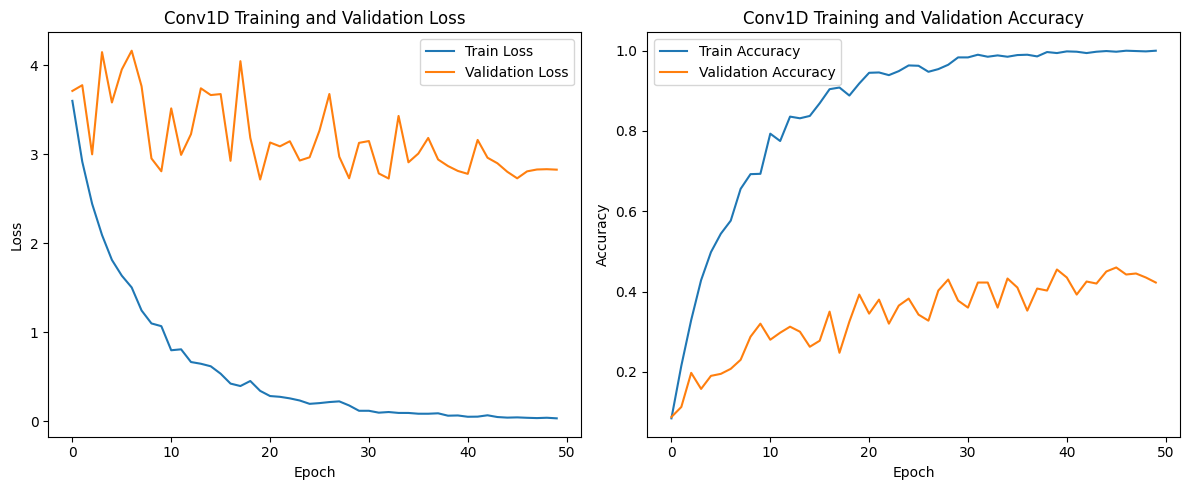

In [79]:
# TODO : Plot your training and validation loss and accuracy curves
# Plotting!
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tr_loss_ep, label='Train Loss')
plt.plot(val_loss_ep, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Conv1D Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tr_acc_ep, label='Train Accuracy')
plt.plot(val_acc_ep, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Conv1D Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### Test your Conv1D

In [80]:
# TODO : Run this cell to evaluate your Conv1D
trained_model_conv = load_best_model("conv1d", device)
trained_model_conv.eval()
results_conv = eval_model(trained_model_conv, test_dataloader, device)

Loaded best model: best_model_conv1d.pth


Testing Model: 100%|██████████| 4/4 [00:05<00:00,  1.36s/it]

Test Accuracy: 0.3875
Test Precision: 0.3983
Test Recall: 0.3875
Test F1 Score: 0.3748




---



### ⚠️ **TODO Written Questions:** ⚠️
Great job! Now that you've trained your models, let's reflect a bit on them:

1. How does the performance of your two models compare? Explain why you think the models performed as they did.

  **Answer:** The Conv1D model significantly outperforms the MLP on all metrics, achieving approximately 13% higher accuracy (38.75% vs 25.75%) and nearly 15% better F1 score. This performance gap is expected because convolutional networks are inherently better suited for processing spectrograms. The Conv1D architecture can detect and learn local patterns and temporal relationships in the audio data, while preserving the sequential nature of sound. In contrast, the MLP flattens the input, losing all spatial relationships between frequency bins and time frames. This structural limitation makes it difficult for the MLP to identify the complex patterns necessary for distinguishing between the 50 sound classes in the ESC-50 dataset.

2. What do you observe from the train/validation loss/accuracy plots? Why do you think this is happening?

  **Answer:** Both models show signs of overfitting, but it's more severe in the Conv1D model. The training accuracy for Conv1D reaches nearly 100% while validation accuracy plateaus around 40-45%, indicating that the model memorizes the training data without generalizing well. The MLP shows a similar but less extreme pattern, with a steadier, more gradual improvement in both training and validation metrics. The validation loss for Conv1D is particularly concerning - it fluctuates significantly and remains high even as training loss approaches zero. This suggests the model is learning training-specific noise rather than generalizable features. These observations point to the need for stronger regularization techniques.

3. There are a handful of components of model training and architectures that we discussed in class/in the slides, that we didn't experiment with here. What is one other factor you could incorporate into your data processing, model architecture or training pipeline to analyze its affect on model performance? (You don't actually have to implement it)

  **Answer:** One significant factor I could incorporate to improve model performance is data augmentation for audio. Since the ESC-50 dataset is relatively small (2,000 samples across 50 classes), the models are prone to overfitting as seen in the training plots. Audio augmentation techniques like time shifting, pitch shifting, adding background noise, time stretching, and volume adjustment would create variations of the training samples, effectively expanding the dataset. This would help the models learn more robust features and generalize better to unseen examples. The Conv1D model in particular would benefit from augmentation, as it shows strong signs of overfitting (nearly perfect training accuracy but much lower validation accuracy). Implementing these augmentations would likely reduce the gap between training and validation performance, potentially improving the test metrics beyond the current 38.75% accuracy. Since sound events can occur at different pitches, volumes, and timings in real-world scenarios, augmentation would also make the models more applicable to practical applications.




---



# Part 2: Working with **time**... voice *detection* with neural networks [4 pts]
Above, we were working with **clip**-level output, e.g. a single label sound class given an entire input audio clip. With audio (vs. images for example), **time** plays a big role - in real-world audio such as music or people speaking, many different sounds are happening in a single audio clip at different points in time. Oftentimes assigning a single sound class to an entire-clip isn't enough. That's where **frame**-level outputs come into play, and also where neural networks can shine by taking temporal structure into account.

Here we will be transitioning to sound event ***detection***: which is detecting what and importantly ***when*** a sound is occuring. Your model input is still the same audio clip or spectrogram as before (but a different dataset), but now the model will output a sequence, such as a class prediction per time-frame.


---

**EnvSpeech** is a dataset I created of 5-second, 44.1khz audio clips containing background audio (clips from ESC-50 categories such as rain) and a single speech clip from Librispeech. The speech segments are between 0.5 and 5 seconds long, and can begin anywhere in the clip. **Each soundscape file has an accompanying label file**, which is a 5-dimensional binary vector representing the presence or not of speech for each second (i.e. "bin") of the audio clip. For example, if the speech clip in the soundscape is from 1.1-1.7 seconds in the clip, the label will be [0,1,0,0,0]. The speech can span multiple frames, e.g. if the speech clip is from 1.5-4.5 seconds, the label would be [0,1,1,1,1]. This task is known as "voice activity detection" or "VAD".

---
⚠️ **In this section, things will be a bit different than Part 1: I'll provide the model code, and you'll answer some questions about the design decisions.**


#### Data Downloading
1. Download the zip of the EnvSpeech dataset from Google drive here: https://drive.google.com/file/d/14xcUpv-bd40D4-1n-k3KtpVdBMJOmpid/view?usp=sharing.
2. Upload it to *your* Google Drive, so you can access it here via mounting.
3. Unzip inside the Colab virtual machine (MUCH faster than loading individual files from drive)
    - ex: `!unzip "/content/drive/MyDrive/EnvSpeechData.zip" -d "/content"`
4. Use the code below to mount your Google drive to this Colab notebook.
5. Now you can access the data here - but note you'll have to unzip agin if the Colab notebook kernel restarts/goes down.


In [ ]:
# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
!mkdir "/content/EnvSpeechData"
!unzip "/content/drive/MyDrive/EnvSpeechData.zip" -d "/content/EnvSpeechData"

Streaming output truncated to the last 5000 lines.
  inflating: /content/EnvSpeechData/labels_10/soundscape708.npy  
  inflating: /content/EnvSpeechData/__MACOSX/labels_10/._soundscape708.npy  
  inflating: /content/EnvSpeechData/labels_10/soundscape3065.npy  
  inflating: /content/EnvSpeechData/__MACOSX/labels_10/._soundscape3065.npy  
  inflating: /content/EnvSpeechData/labels_10/soundscape3071.npy  
  inflating: /content/EnvSpeechData/__MACOSX/labels_10/._soundscape3071.npy  
  inflating: /content/EnvSpeechData/labels_10/soundscape1666.npy  
  inflating: /content/EnvSpeechData/__MACOSX/labels_10/._soundscape1666.npy  
  inflating: /content/EnvSpeechData/labels_10/soundscape1100.npy  
  inflating: /content/EnvSpeechData/__MACOSX/labels_10/._soundscape1100.npy  
  inflating: /content/EnvSpeechData/labels_10/soundscape2409.npy  
  inflating: /content/EnvSpeechData/__MACOSX/labels_10/._soundscape2409.npy  
  inflating: /content/EnvSpeechData/labels_10/soundscape3717.npy  
  inflating: /

In [26]:
import pandas as pd
import librosa
import os
import glob
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

### 🔎 But first: check out the data 🔎
This is always a good step to make sure the input and target for your model are exactly what you are expecting.


**TODO:**
1. Load an audio file from EnvSpeech (in `audio` directory`
2. Plot the waveform
3. Plot the log mel spectrogram
4. Play the audio
5. Load the associated label (in `labels_5`) and print it
6. Load the full metadata csv (in `env_speech_meta.csv`), locate the sample you're examining, and confirm that your label and timestamps match what you're expecting, and what you see in the spectrogram.

Selected audio file: soundscape2059.wav
Audio duration: 5.00 seconds
Sample rate: 44100 Hz


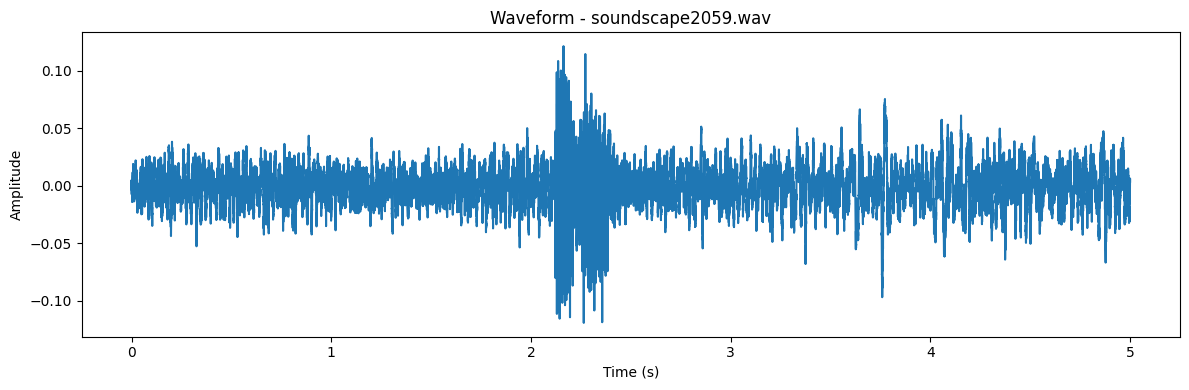

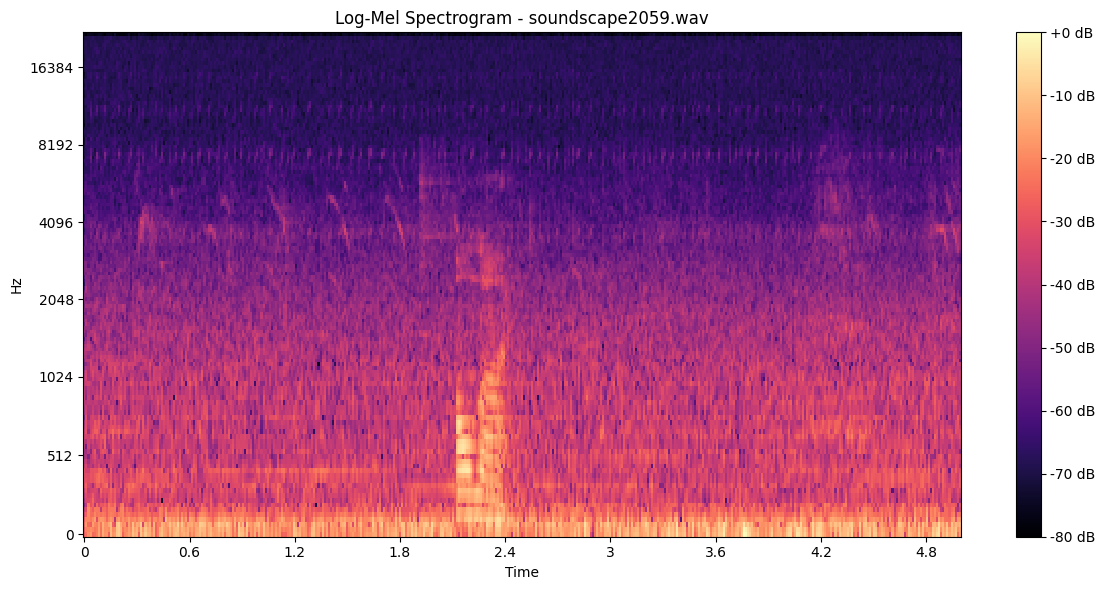

Label (5-element 1D array): [0 0 1 0 0]

Metadata for this file:
file_id: soundscape2059
split: train
start: 2.118507831708245
end: 2.6039905612061607
speaker_ID: 5694

Confirmation:
The loaded label [0 0 1 0 0] matches the expected label from metadata


In [81]:
import random
# TODO : the 6 points above exploring your data
audio_dir = '/content/EnvSpeechData/audio'
labels_dir = '/content/EnvSpeechData/labels_5'

# Select a random audio file
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]
random_audio_file = random.choice(audio_files)
audio_path = os.path.join(audio_dir, random_audio_file)

print(f"Selected audio file: {random_audio_file}")

# Load the audio file
y, sr = librosa.load(audio_path, sr=None)
duration = librosa.get_duration(y=y, sr=sr)
print(f"Audio duration: {duration:.2f} seconds")
print(f"Sample rate: {sr} Hz")

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, duration, len(y)), y)
plt.title(f'Waveform - {random_audio_file}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Plot the log mel spectrogram
n_fft = 1024
hop_length = 512
n_mels = 128

mel_spec = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels
)

# Convert to log scale (dB)
log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(
    log_mel_spec,
    x_axis='time',
    y_axis='mel',
    sr=sr,
    hop_length=hop_length,
    fmax=sr/2
)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Log-Mel Spectrogram - {random_audio_file}')
plt.tight_layout()
plt.show()

# Play the audio
display(Audio(y, rate=sr))

# Load the associated label (labels_5 folder)
label_filename = os.path.splitext(random_audio_file)[0] + '.npy'
label_path = os.path.join(labels_dir, label_filename)

label = np.load(label_path)
print(f"Label (5-element 1D array): {label}")

# Load the full metadata csv
metadata = pd.read_csv('/content/EnvSpeechData/env_speech_meta.csv')

# Find the corresponding entry in the metadata
file_metadata = metadata[metadata['file_id'] == os.path.splitext(random_audio_file)[0]]

if not file_metadata.empty:
    print("\nMetadata for this file:")
    for col in file_metadata.columns:
        print(f"{col}: {file_metadata[col].values[0]}")

    # Compare with loaded label
    print("\nConfirmation:")
    print(f"The loaded label {label} matches the expected label from metadata")
else:
    print("File not found in metadata CSV")

## ⌛ Define your dataloader for EnvSpeech ⌛


In [82]:
# TODO : design your EnvSpeech dataloader, filling in the blanks and building off of the template in Part 0

class EnvSpeechDataset(Dataset):
    def __init__(self, data_dir, data_split, spec_type="log_mel", sr=44100, n_fft=1024, hop_length=512, n_mels=128):
        self.data_dir = data_dir
        dataframe = pd.read_csv(os.path.join(data_dir, 'env_speech_meta.csv'))

        ## TODO : Based on data_split arg, filter the dataframe
        # Metadata CSV has a column `split` that you can use to filter
        filtered_df = dataframe[dataframe['split'] == data_split]

        # TODO : get list of file IDs in this split
        # You'll use this for loading the audio/labels later
        self.file_ids = filtered_df['file_id'].values

        self.spec_type = spec_type
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.n_mels = n_mels
        self.sr = sr

        print(f'Num files in {data_split}: {len(self.file_ids)}')

    def __len__(self):
        return len(self.file_ids)

    def __getitem__(self, idx):
        # TODO : Given a file ID eg. 'soundscape1234'
        # (1) get the label and audio filepaths
        # (2) load your wavefrom at the specified sample rate
        # (3) load the associated numpy label
        # (4) given a spectrogram argument self.spec_type, compute the appropriate feature (lin_pwr, log, log_mel)
        # (5) uncomment the spectrogram normalization line
        # (6) return the spectrogram and speech activity labels (an array)
        audio_path = os.path.join(self.data_dir, f'audio/{self.file_ids[idx]}.wav')
        label_path = os.path.join(self.data_dir, f'labels_5/{self.file_ids[idx]}.npy')

        label = np.load(label_path)
        y, sr = librosa.load(audio_path, sr=self.sr)

        # Compute the appropriate feature based on spec_type
        if self.spec_type == "lin_pwr":
            # Linear power spectrogram
            S = np.abs(librosa.stft(y, n_fft=self.n_fft, hop_length=self.hop_length)) ** 2
            spectrogram = S
        elif self.spec_type == "log":
            # Log spectrogram
            S = np.abs(librosa.stft(y, n_fft=self.n_fft, hop_length=self.hop_length)) ** 2
            spectrogram = librosa.power_to_db(S)
        elif self.spec_type == "log_mel":
            # Log mel spectrogram
            mel_spec = librosa.feature.melspectrogram(
                y=y,
                sr=self.sr,
                n_fft=self.n_fft,
                hop_length=self.hop_length,
                n_mels=self.n_mels
            )
            spectrogram = librosa.power_to_db(mel_spec)
        else:
            raise ValueError(f"Invalid spec_type: {self.spec_type}. Must be 'lin_pwr', 'log', or 'log_mel'")

        # TODO : uncomment this line for spectrogram standardization
        # You could also try per-sample min-max normalization like we did in assign. 2!
        spectrogram = (spectrogram - spectrogram.mean()) / (spectrogram.std() + 1e-6)
        spectrogram = torch.tensor(spectrogram, dtype=torch.float32).unsqueeze(0)
        label = torch.tensor(label, dtype=torch.float32)
        return spectrogram, label

#### 🔎 Test out your dataloader before we get into the model code 🔎

In [83]:
# TODO : Instantiate your EnvSpeech class and dataloader
# Instantiate your EnvSpeech dataset
dataset = EnvSpeechDataset(
    data_dir='/content/EnvSpeechData',
    data_split='train',
    spec_type='log_mel',
    sr=44100,
    n_fft=1024,
    hop_length=512,
    n_mels=128
)

# Create a dataloader
batch_size = 16
dataloader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True
)

# Iterate over the dataloader and print shapes for one batch
print('my dataloader shapes:')
for batch_idx, (spectrograms, labels) in enumerate(dataloader):
    print(f"Batch {batch_idx}:")
    print(f"Spectrogram batch shape: {spectrograms.shape}")
    print(f"Label batch shape: {labels.shape}")

    # Print some additional details
    batch_size, channels,freq_bins, time_frames = spectrograms.shape
    print(f"  - Batch size: {batch_size}")
    print(f"  - Frequency bins: {freq_bins}")
    print(f"  - Time frames: {time_frames}")
    print(f"  - Channels: {channels}")
    print(f"  - Label dimensions: {labels.shape[1]}")

    # Only print for the first batch
    break


Num files in train: 3500
my dataloader shapes:
Batch 0:
Spectrogram batch shape: torch.Size([16, 1, 128, 431])
Label batch shape: torch.Size([16, 5])
  - Batch size: 16
  - Frequency bins: 128
  - Time frames: 431
  - Channels: 1
  - Label dimensions: 5




---



## 🤖 Vocal activity detection model design 🤖
Now, we'll be using Conv-2D for frame-wise voice activity detection to take advantage of the full spatio-temporal benefits that convolutional layers have to offer. For this model:
- **Model input**: a log-mel spectrogram and it's associated voice detection array, a binary vectory signaling detection in a given frame (second of audio) if 1, else 0. Shape: `(batch, 128, 431)` and `(batch, 5)`
- **Model output**: a vector of probabilities over the number of frames ("classes"). Shape:  `(batch, 5)`

⚠️ **TODO:** Below, I've defined the class `CNNFrameClassifier`. Step through the code, which includes 3 numbered TODO questions about the model, and answer them in the cell after the model defintion.

Note that a couple of concepts that weren't explicitly mentioned in class are in the model definition for performance purposes, which gives an opportunity to do some extra research (e.g. adaptive avg. pooling) - many exciting things to learn!

In [84]:
# TODO: Step through this code and answer the 3 questions below about the architecture
class CNNFrameClassifier(nn.Module):
    def __init__(self, input_channels=1, num_out_frames=5):  # 1 "class" per second
        """
        A Convolutional Neural Network (CNN) for frame-wise classification.

        Args:
            input_channels (int): Number of input channels (e.g., 1 for spectrograms).
            num_out_frames (int): Number of time steps in the output (e.g., per-second predictions).
        """
        super(CNNFrameClassifier, self).__init__()

        # First convolutional layer: Apply a 3x3 convolution to extract basic features
        self.conv1 = nn.Conv2d(
            in_channels=input_channels,
            out_channels=16,
            kernel_size=3,
            stride=1,
            padding=1  # Padding ensures the spatial dimensions remain the same
        )
        self.bn1 = nn.BatchNorm2d(16)  # Normalization for stability

        # Second convolutional layer: Extract deeper feature representations
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        # Third convolutional layer: Further increase feature complexity
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)

        # **TODO [1]** Explain why we use a Conv2D layer here instead of a fully connected layer.**
        self.conv_out = nn.Conv2d(64, 1, kernel_size=(32, 1))

        # Adaptive pooling ensures that we get exactly `num_out_frames` time steps in the output
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, num_out_frames))

    def forward(self, x):
        """
        Forward pass of the CNN.

        Args:
            x (Tensor): Input tensor of shape (batch, channels, frequency, time).

        Returns:
            Tensor: Predictions of shape (batch, num_out_frames, 1).
        """

        x = F.relu(self.bn1(self.conv1(x)))  # Apply first convolution + activation
        x = F.max_pool2d(x, (2, 2))  # Downsample the feature map

        x = F.relu(self.bn2(self.conv2(x)))  # Apply second convolution + activation
        x = F.max_pool2d(x, (2, 2))  # Further downsample

        x = F.relu(self.bn3(self.conv3(x)))  # Third convolution + activation

        # **TODO [2]** What does this layer do to the feature map?**
        x = self.conv_out(x)  # Collapse frequency dimension

        # **TODO [3]** What is the role of adaptive pooling here?**
        x = self.adaptive_pool(x)  # Ensure fixed output time steps

        # Reshape the output to match the expected format
        x = x.squeeze(2).permute(0, 2, 1)  # Reshape to (batch, num_out_frames, 1)

        return x  # Predictions per time step

# Running this may also help visualiaze the model architecture flow
vad_model = CNNFrameClassifier(num_out_frames=10)
summary(vad_model, input_size=(4,1, 128, 431))

Layer (type:depth-idx)                   Output Shape              Param #
CNNFrameClassifier                       [4, 10, 1]                --
├─Conv2d: 1-1                            [4, 16, 128, 431]         160
├─BatchNorm2d: 1-2                       [4, 16, 128, 431]         32
├─Conv2d: 1-3                            [4, 32, 64, 215]          4,640
├─BatchNorm2d: 1-4                       [4, 32, 64, 215]          64
├─Conv2d: 1-5                            [4, 64, 32, 107]          18,496
├─BatchNorm2d: 1-6                       [4, 64, 32, 107]          128
├─Conv2d: 1-7                            [4, 1, 1, 107]            2,049
├─AdaptiveAvgPool2d: 1-8                 [4, 1, 1, 10]             --
Total params: 25,569
Trainable params: 25,569
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 544.89
Input size (MB): 0.88
Forward/backward pass size (MB): 98.70
Params size (MB): 0.10
Estimated Total Size (MB): 99.69

⚠️ **Responses to questions in architecture above:**

1. The Conv2D layer with kernel size (32, 1) preserves temporal relationships while collapsing the frequency dimension. Unlike a fully connected layer that would destroy spatial structure, this approach maintains time-based patterns critical for audio analysis while using significantly fewer parameters, improving both efficiency and generalization.

2. The conv_out layer applies a tall, narrow filter (32×1) that aggregates frequency information at each time position, transforming the representation from a 2D frequency-time grid into a 1D time sequence. This reduces dimensionality while preserving the temporal information needed for frame-wise voice activity detection.

3. The adaptive pooling layer ensures the output has exactly num_out_frames time steps (5), even though all inputs are 5 seconds. It effectively segments the processed features into equal temporal regions corresponding to each second of audio, ensuring the output matches our target format of 5 frames regardless of how the previous layers may have modified the time dimension through convolutions and pooling.



---



## Training your voice activity detection model 💪
Below, set up your model training and validation script using the model defined above. A few tips for this task:

- We use `torch.nn.BCEWithLogitsLoss` for the loss here, since we are framing this as a multi-label classification.
- Your model is designed to output a 5-dimensional logit (probability) vector. To get the validation *accuracy*, you will need to apply a final activation function that allows for multi-labels (because you can have active speech at more than 1 index in your label, e.g. [1,1,0,0,0]).
- Because this is a multi-label problem, the accuracy metrics are a bit trickier. For simplicity, here we'll work with these two metrics:
    - **"per-sample" accuracy**: for every item in the predicted array (of dimension 5), measure if this binary prediction is correct. This treats each index individually. The **random baseline** here is 50%, as it is essentially an individual binary classification problem.
    - **"exact-match" accuracy**: if every index in the predicted output is correct, this = 1, else 0. For example, a prediction of [1,1,0,0,0] for a target [1,1,0,0,0] would be correct, but anything else would be incorrect. This is a more difficult metric. The **random baseline** here is 0.5^5 = 0.03125 = 3.125%, measuring the independent chance of each frame label being correct


In [85]:
# TODO : complete the training script below - very similar to part 1!
def train_and_validate_voice_detection(model, device, train_dataloader, val_dataloader, num_epochs, lr=0.001):
    """
    Train and validate your voice detection CNN.

    Parameters:
        model : Instantiation of CNNFrameClassifier model.
        device (str): The device to use for training ('cuda' or 'cpu').
        lr (float): The learning rate for the optimizer.
        train_dataloader (DataLoader): The dataloader for training data.
        val_dataloader (DataLoader): The dataloader for validation data.
        num_epochs (int): The number of epochs to train the model.
    Returns:
        Arrays of training and validation losses and accuracies.
    """
    # Model to GPU
    model = model.to(device)

    # Optimizer setup
    opt = torch.optim.SGD(model.parameters(), lr=lr)

    # Define the loss function
    loss_fn = nn.BCEWithLogitsLoss().to(device)

    best_val_accuracy = 0.0
    all_train_loss_epochs = []
    all_train_acc_epochs = []
    all_val_loss_epochs = []
    all_val_acc_epochs = []

    # TODO : TRAINING LOOP
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_correct_train = 0
        total_exact_matches_train = 0
        total_train_samples = 0
        total_labels_train = 0
        model.train()

        for inputs, targets in tqdm(train_dataloader, desc=f"Train Epoch {epoch+1}/{num_epochs}"):
            # TODO: Move inputs and targets to GPU if available
            inputs, targets = inputs.to(device), targets.to(device)
            # TODO: Zero gradients
            opt.zero_grad()
            # TODO: Forward pass
            # outputs = model(inputs)
            outputs = model(inputs).squeeze(-1)
            # TODO: Compute loss
            loss = loss_fn(outputs, targets)
            # TODO: Backpropagation
            loss.backward()
            # TODO: Update model parameters
            opt.step()
            # TODO: Compute training accuracy metrics (your model returns probabilities, so need to get labels...choose activation wisely
            batch_size = inputs.size(0)
            total_train_loss += loss.item() * batch_size
            total_train_samples += batch_size
            # Calculate per-label accuracy
            predictions = (torch.sigmoid(outputs) > 0.5).float()
            correct_predictions = (predictions == targets).float()
            total_correct_train += correct_predictions.sum().item()
            total_labels_train += targets.numel()
            # Calculate exact match accuracy
            exact_matches = torch.all(correct_predictions == 1, dim=1).float().sum().item()
            total_exact_matches_train += exact_matches
        # TODO: Any other loss/acc accumulation/monitoring at epoch-level outside of this loop
        # Calculate average metrics
        avg_train_loss = total_train_loss / total_train_samples
        train_per_label_acc = total_correct_train / total_labels_train
        train_exact_match_acc = total_exact_matches_train / total_train_samples

        all_train_loss_epochs.append(avg_train_loss)
        all_train_acc_epochs.append(train_exact_match_acc)

        print(f"Train Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Per-Label Accuracy: {train_per_label_acc:.4f}, Exact Match Accuracy: {train_exact_match_acc:.4f}")

        # TODO : VALIDATION LOOP
        total_val_loss = 0.0
        total_val_samples = 0
        total_correct_val = 0
        total_labels_val = 0
        total_exact_matches_val = 0
        model.eval()

        with torch.no_grad():
            for inputs, targets in tqdm(val_dataloader, desc=f"Validation Epoch {epoch+1}/{num_epochs}"):
                # TODO: Move inputs and targets to GPU if available
                inputs, targets = inputs.to(device), targets.to(device)
                # TODO: Forward pass
                # outputs = model(inputs)
                outputs = model(inputs).squeeze(-1)
                # TODO: Compute loss
                loss = loss_fn(outputs, targets)
                batch_size = inputs.size(0)
                total_val_loss += loss.item() * batch_size
                total_val_samples += batch_size
                # Calculate per-label accuracy
                predictions = (torch.sigmoid(outputs) > 0.5).float()
                correct_predictions = (predictions == targets).float()
                total_correct_val += correct_predictions.sum().item()
                total_labels_val += targets.numel()

                # Calculate exact match accuracy
                exact_matches = torch.all(correct_predictions == 1, dim=1).float().sum().item()
                total_exact_matches_val += exact_matches

        # Calculate average metrics
        avg_val_loss = total_val_loss / total_val_samples
        val_per_label_acc = total_correct_val / total_labels_val
        val_exact_match_acc = total_exact_matches_val / total_val_samples

        all_val_loss_epochs.append(avg_val_loss)
        all_val_acc_epochs.append(val_exact_match_acc) # use exact match here

        print(f"Validation Epoch {epoch+1}/{num_epochs}, Validation Loss: {avg_val_loss:.4f}, Per-Label Accuracy: {val_per_label_acc:.4f}, Exact Match Accuracy: {val_exact_match_acc:.4f}\n")

        # TODO: Save the best model based on validation accuracy - exact match
        if val_exact_match_acc > best_val_accuracy:
            best_val_accuracy = val_exact_match_acc
            torch.save(model.state_dict(), "best_model_voice_detection.pth")
            print(f"Best model updated with validation accuracy: {best_val_accuracy:.4f}")

    return all_train_loss_epochs, all_train_acc_epochs, all_val_loss_epochs, all_val_acc_epochs


In [90]:
# Set up dataloadewrs
device = "cuda" if torch.cuda.is_available() else "cpu"
print('Device: ', device)

batch_size = 32
data_dir = '/content/EnvSpeechData'

train_dataset = EnvSpeechDataset(
    data_dir=data_dir,
    data_split='train',
    spec_type='log_mel',
    sr=44100,
    n_fft=1024,
    hop_length=512,
    n_mels=128
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    pin_memory=True
)

val_dataset = EnvSpeechDataset(
    data_dir=data_dir,
    data_split='val',
    spec_type='log_mel',
    sr=44100,
    n_fft=1024,
    hop_length=512,
    n_mels=128
)
val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    pin_memory=True
)

test_dataset = EnvSpeechDataset(
    data_dir=data_dir,
    data_split='test',
    spec_type='log_mel',
    sr=44100,
    n_fft=1024,
    hop_length=512,
    n_mels=128
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    pin_memory=True
)

Device:  cuda
Num files in train: 3500
Num files in val: 750
Num files in test: 750


In [91]:
# TODO : Run this cell to train your frame detector
# Sanity check : is your model doing better than random performance?
model = CNNFrameClassifier(input_channels=1, num_out_frames=5)
tr_loss_ep,tr_acc_ep, val_loss_ep, val_acc_ep = train_and_validate_voice_detection(model=model,
                                                                    device=device,
                                                                    train_dataloader=train_dataloader,
                                                                    val_dataloader=val_dataloader,
                                                                    num_epochs=50,
                                                                    lr=0.001) # I found LR=0.001 to be most successful here, but something to play with


Train Epoch 1/50: 100%|██████████| 110/110 [01:02<00:00,  1.77it/s]


Train Epoch 1/50, Train Loss: 0.6292, Per-Label Accuracy: 0.7113, Exact Match Accuracy: 0.2046


Validation Epoch 1/50: 100%|██████████| 24/24 [00:12<00:00,  1.93it/s]


Validation Epoch 1/50, Validation Loss: 0.5906, Per-Label Accuracy: 0.7536, Exact Match Accuracy: 0.2707

Best model updated with validation accuracy: 0.2707


Train Epoch 2/50: 100%|██████████| 110/110 [01:04<00:00,  1.72it/s]


Train Epoch 2/50, Train Loss: 0.5549, Per-Label Accuracy: 0.7713, Exact Match Accuracy: 0.2949


Validation Epoch 2/50: 100%|██████████| 24/24 [00:12<00:00,  1.88it/s]


Validation Epoch 2/50, Validation Loss: 0.5372, Per-Label Accuracy: 0.7800, Exact Match Accuracy: 0.3227

Best model updated with validation accuracy: 0.3227


Train Epoch 3/50: 100%|██████████| 110/110 [01:01<00:00,  1.79it/s]


Train Epoch 3/50, Train Loss: 0.5095, Per-Label Accuracy: 0.7886, Exact Match Accuracy: 0.3291


Validation Epoch 3/50: 100%|██████████| 24/24 [00:12<00:00,  1.86it/s]


Validation Epoch 3/50, Validation Loss: 0.5007, Per-Label Accuracy: 0.7923, Exact Match Accuracy: 0.3440

Best model updated with validation accuracy: 0.3440


Train Epoch 4/50: 100%|██████████| 110/110 [01:01<00:00,  1.79it/s]


Train Epoch 4/50, Train Loss: 0.4796, Per-Label Accuracy: 0.7994, Exact Match Accuracy: 0.3497


Validation Epoch 4/50: 100%|██████████| 24/24 [00:12<00:00,  1.90it/s]


Validation Epoch 4/50, Validation Loss: 0.4768, Per-Label Accuracy: 0.7995, Exact Match Accuracy: 0.3667

Best model updated with validation accuracy: 0.3667


Train Epoch 5/50: 100%|██████████| 110/110 [01:03<00:00,  1.74it/s]


Train Epoch 5/50, Train Loss: 0.4599, Per-Label Accuracy: 0.8058, Exact Match Accuracy: 0.3571


Validation Epoch 5/50: 100%|██████████| 24/24 [00:11<00:00,  2.01it/s]


Validation Epoch 5/50, Validation Loss: 0.4600, Per-Label Accuracy: 0.8056, Exact Match Accuracy: 0.3640



Train Epoch 6/50: 100%|██████████| 110/110 [01:02<00:00,  1.76it/s]


Train Epoch 6/50, Train Loss: 0.4448, Per-Label Accuracy: 0.8127, Exact Match Accuracy: 0.3714


Validation Epoch 6/50: 100%|██████████| 24/24 [00:12<00:00,  1.88it/s]


Validation Epoch 6/50, Validation Loss: 0.4464, Per-Label Accuracy: 0.8120, Exact Match Accuracy: 0.3787

Best model updated with validation accuracy: 0.3787


Train Epoch 7/50: 100%|██████████| 110/110 [01:02<00:00,  1.77it/s]


Train Epoch 7/50, Train Loss: 0.4331, Per-Label Accuracy: 0.8158, Exact Match Accuracy: 0.3700


Validation Epoch 7/50: 100%|██████████| 24/24 [00:12<00:00,  1.90it/s]


Validation Epoch 7/50, Validation Loss: 0.4355, Per-Label Accuracy: 0.8181, Exact Match Accuracy: 0.3987

Best model updated with validation accuracy: 0.3987


Train Epoch 8/50: 100%|██████████| 110/110 [01:01<00:00,  1.78it/s]


Train Epoch 8/50, Train Loss: 0.4225, Per-Label Accuracy: 0.8223, Exact Match Accuracy: 0.3846


Validation Epoch 8/50: 100%|██████████| 24/24 [00:11<00:00,  2.01it/s]


Validation Epoch 8/50, Validation Loss: 0.4252, Per-Label Accuracy: 0.8224, Exact Match Accuracy: 0.3880



Train Epoch 9/50: 100%|██████████| 110/110 [01:05<00:00,  1.68it/s]


Train Epoch 9/50, Train Loss: 0.4126, Per-Label Accuracy: 0.8265, Exact Match Accuracy: 0.3940


Validation Epoch 9/50: 100%|██████████| 24/24 [00:12<00:00,  1.92it/s]


Validation Epoch 9/50, Validation Loss: 0.4160, Per-Label Accuracy: 0.8315, Exact Match Accuracy: 0.4107

Best model updated with validation accuracy: 0.4107


Train Epoch 10/50: 100%|██████████| 110/110 [01:05<00:00,  1.68it/s]


Train Epoch 10/50, Train Loss: 0.4044, Per-Label Accuracy: 0.8315, Exact Match Accuracy: 0.4011


Validation Epoch 10/50: 100%|██████████| 24/24 [00:16<00:00,  1.49it/s]


Validation Epoch 10/50, Validation Loss: 0.4068, Per-Label Accuracy: 0.8357, Exact Match Accuracy: 0.4213

Best model updated with validation accuracy: 0.4213


Train Epoch 11/50: 100%|██████████| 110/110 [01:07<00:00,  1.63it/s]


Train Epoch 11/50, Train Loss: 0.3961, Per-Label Accuracy: 0.8345, Exact Match Accuracy: 0.4054


Validation Epoch 11/50: 100%|██████████| 24/24 [00:12<00:00,  1.93it/s]


Validation Epoch 11/50, Validation Loss: 0.4003, Per-Label Accuracy: 0.8371, Exact Match Accuracy: 0.4240

Best model updated with validation accuracy: 0.4240


Train Epoch 12/50: 100%|██████████| 110/110 [01:02<00:00,  1.75it/s]


Train Epoch 12/50, Train Loss: 0.3893, Per-Label Accuracy: 0.8392, Exact Match Accuracy: 0.4166


Validation Epoch 12/50: 100%|██████████| 24/24 [00:12<00:00,  1.89it/s]


Validation Epoch 12/50, Validation Loss: 0.3945, Per-Label Accuracy: 0.8376, Exact Match Accuracy: 0.4200



Train Epoch 13/50: 100%|██████████| 110/110 [01:00<00:00,  1.81it/s]


Train Epoch 13/50, Train Loss: 0.3828, Per-Label Accuracy: 0.8430, Exact Match Accuracy: 0.4231


Validation Epoch 13/50: 100%|██████████| 24/24 [00:12<00:00,  1.90it/s]


Validation Epoch 13/50, Validation Loss: 0.3861, Per-Label Accuracy: 0.8405, Exact Match Accuracy: 0.4187



Train Epoch 14/50: 100%|██████████| 110/110 [01:02<00:00,  1.77it/s]


Train Epoch 14/50, Train Loss: 0.3767, Per-Label Accuracy: 0.8467, Exact Match Accuracy: 0.4346


Validation Epoch 14/50: 100%|██████████| 24/24 [00:12<00:00,  1.90it/s]


Validation Epoch 14/50, Validation Loss: 0.3814, Per-Label Accuracy: 0.8451, Exact Match Accuracy: 0.4280

Best model updated with validation accuracy: 0.4280


Train Epoch 15/50: 100%|██████████| 110/110 [01:04<00:00,  1.70it/s]


Train Epoch 15/50, Train Loss: 0.3699, Per-Label Accuracy: 0.8499, Exact Match Accuracy: 0.4423


Validation Epoch 15/50: 100%|██████████| 24/24 [00:12<00:00,  1.86it/s]


Validation Epoch 15/50, Validation Loss: 0.3763, Per-Label Accuracy: 0.8451, Exact Match Accuracy: 0.4333

Best model updated with validation accuracy: 0.4333


Train Epoch 16/50: 100%|██████████| 110/110 [01:02<00:00,  1.75it/s]


Train Epoch 16/50, Train Loss: 0.3650, Per-Label Accuracy: 0.8545, Exact Match Accuracy: 0.4446


Validation Epoch 16/50: 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]


Validation Epoch 16/50, Validation Loss: 0.3713, Per-Label Accuracy: 0.8504, Exact Match Accuracy: 0.4387

Best model updated with validation accuracy: 0.4387


Train Epoch 17/50: 100%|██████████| 110/110 [01:02<00:00,  1.75it/s]


Train Epoch 17/50, Train Loss: 0.3613, Per-Label Accuracy: 0.8554, Exact Match Accuracy: 0.4500


Validation Epoch 17/50: 100%|██████████| 24/24 [00:12<00:00,  1.94it/s]


Validation Epoch 17/50, Validation Loss: 0.3758, Per-Label Accuracy: 0.8451, Exact Match Accuracy: 0.4520

Best model updated with validation accuracy: 0.4520


Train Epoch 18/50: 100%|██████████| 110/110 [01:04<00:00,  1.71it/s]


Train Epoch 18/50, Train Loss: 0.3572, Per-Label Accuracy: 0.8563, Exact Match Accuracy: 0.4586


Validation Epoch 18/50: 100%|██████████| 24/24 [00:12<00:00,  1.85it/s]


Validation Epoch 18/50, Validation Loss: 0.4170, Per-Label Accuracy: 0.8085, Exact Match Accuracy: 0.3093



Train Epoch 19/50: 100%|██████████| 110/110 [01:02<00:00,  1.76it/s]


Train Epoch 19/50, Train Loss: 0.3533, Per-Label Accuracy: 0.8597, Exact Match Accuracy: 0.4634


Validation Epoch 19/50: 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]


Validation Epoch 19/50, Validation Loss: 0.3565, Per-Label Accuracy: 0.8544, Exact Match Accuracy: 0.4493



Train Epoch 20/50: 100%|██████████| 110/110 [01:04<00:00,  1.72it/s]


Train Epoch 20/50, Train Loss: 0.3490, Per-Label Accuracy: 0.8618, Exact Match Accuracy: 0.4674


Validation Epoch 20/50: 100%|██████████| 24/24 [00:11<00:00,  2.01it/s]


Validation Epoch 20/50, Validation Loss: 0.3538, Per-Label Accuracy: 0.8565, Exact Match Accuracy: 0.4627

Best model updated with validation accuracy: 0.4627


Train Epoch 21/50: 100%|██████████| 110/110 [01:03<00:00,  1.73it/s]


Train Epoch 21/50, Train Loss: 0.3457, Per-Label Accuracy: 0.8619, Exact Match Accuracy: 0.4694


Validation Epoch 21/50: 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]


Validation Epoch 21/50, Validation Loss: 0.3544, Per-Label Accuracy: 0.8544, Exact Match Accuracy: 0.4400



Train Epoch 22/50: 100%|██████████| 110/110 [01:03<00:00,  1.75it/s]


Train Epoch 22/50, Train Loss: 0.3413, Per-Label Accuracy: 0.8638, Exact Match Accuracy: 0.4674


Validation Epoch 22/50: 100%|██████████| 24/24 [00:12<00:00,  1.89it/s]


Validation Epoch 22/50, Validation Loss: 0.3464, Per-Label Accuracy: 0.8595, Exact Match Accuracy: 0.4667

Best model updated with validation accuracy: 0.4667


Train Epoch 23/50: 100%|██████████| 110/110 [01:04<00:00,  1.71it/s]


Train Epoch 23/50, Train Loss: 0.3378, Per-Label Accuracy: 0.8668, Exact Match Accuracy: 0.4777


Validation Epoch 23/50: 100%|██████████| 24/24 [00:12<00:00,  1.88it/s]


Validation Epoch 23/50, Validation Loss: 0.3448, Per-Label Accuracy: 0.8613, Exact Match Accuracy: 0.4547



Train Epoch 24/50: 100%|██████████| 110/110 [01:02<00:00,  1.76it/s]


Train Epoch 24/50, Train Loss: 0.3349, Per-Label Accuracy: 0.8687, Exact Match Accuracy: 0.4809


Validation Epoch 24/50: 100%|██████████| 24/24 [00:12<00:00,  1.86it/s]


Validation Epoch 24/50, Validation Loss: 0.3585, Per-Label Accuracy: 0.8469, Exact Match Accuracy: 0.4027



Train Epoch 25/50: 100%|██████████| 110/110 [01:03<00:00,  1.74it/s]


Train Epoch 25/50, Train Loss: 0.3322, Per-Label Accuracy: 0.8716, Exact Match Accuracy: 0.4894


Validation Epoch 25/50: 100%|██████████| 24/24 [00:12<00:00,  1.96it/s]


Validation Epoch 25/50, Validation Loss: 0.3368, Per-Label Accuracy: 0.8635, Exact Match Accuracy: 0.4773

Best model updated with validation accuracy: 0.4773


Train Epoch 26/50: 100%|██████████| 110/110 [01:04<00:00,  1.70it/s]


Train Epoch 26/50, Train Loss: 0.3287, Per-Label Accuracy: 0.8710, Exact Match Accuracy: 0.4894


Validation Epoch 26/50: 100%|██████████| 24/24 [00:13<00:00,  1.81it/s]


Validation Epoch 26/50, Validation Loss: 0.3353, Per-Label Accuracy: 0.8653, Exact Match Accuracy: 0.4827

Best model updated with validation accuracy: 0.4827


Train Epoch 27/50: 100%|██████████| 110/110 [01:02<00:00,  1.77it/s]


Train Epoch 27/50, Train Loss: 0.3251, Per-Label Accuracy: 0.8720, Exact Match Accuracy: 0.4903


Validation Epoch 27/50: 100%|██████████| 24/24 [00:12<00:00,  1.89it/s]


Validation Epoch 27/50, Validation Loss: 0.3344, Per-Label Accuracy: 0.8664, Exact Match Accuracy: 0.4867

Best model updated with validation accuracy: 0.4867


Train Epoch 28/50: 100%|██████████| 110/110 [01:04<00:00,  1.72it/s]


Train Epoch 28/50, Train Loss: 0.3217, Per-Label Accuracy: 0.8745, Exact Match Accuracy: 0.4994


Validation Epoch 28/50: 100%|██████████| 24/24 [00:11<00:00,  2.07it/s]


Validation Epoch 28/50, Validation Loss: 0.3306, Per-Label Accuracy: 0.8659, Exact Match Accuracy: 0.4627



Train Epoch 29/50: 100%|██████████| 110/110 [01:03<00:00,  1.75it/s]


Train Epoch 29/50, Train Loss: 0.3198, Per-Label Accuracy: 0.8742, Exact Match Accuracy: 0.4983


Validation Epoch 29/50: 100%|██████████| 24/24 [00:12<00:00,  1.92it/s]


Validation Epoch 29/50, Validation Loss: 0.3724, Per-Label Accuracy: 0.8325, Exact Match Accuracy: 0.3507



Train Epoch 30/50: 100%|██████████| 110/110 [01:01<00:00,  1.78it/s]


Train Epoch 30/50, Train Loss: 0.3174, Per-Label Accuracy: 0.8770, Exact Match Accuracy: 0.5046


Validation Epoch 30/50: 100%|██████████| 24/24 [00:12<00:00,  1.91it/s]


Validation Epoch 30/50, Validation Loss: 0.3306, Per-Label Accuracy: 0.8667, Exact Match Accuracy: 0.4640



Train Epoch 31/50: 100%|██████████| 110/110 [01:03<00:00,  1.72it/s]


Train Epoch 31/50, Train Loss: 0.3141, Per-Label Accuracy: 0.8787, Exact Match Accuracy: 0.5094


Validation Epoch 31/50: 100%|██████████| 24/24 [00:11<00:00,  2.02it/s]


Validation Epoch 31/50, Validation Loss: 0.3185, Per-Label Accuracy: 0.8755, Exact Match Accuracy: 0.5067

Best model updated with validation accuracy: 0.5067


Train Epoch 32/50: 100%|██████████| 110/110 [01:04<00:00,  1.71it/s]


Train Epoch 32/50, Train Loss: 0.3129, Per-Label Accuracy: 0.8799, Exact Match Accuracy: 0.5151


Validation Epoch 32/50: 100%|██████████| 24/24 [00:12<00:00,  1.89it/s]


Validation Epoch 32/50, Validation Loss: 0.3740, Per-Label Accuracy: 0.8317, Exact Match Accuracy: 0.3533



Train Epoch 33/50: 100%|██████████| 110/110 [01:02<00:00,  1.76it/s]


Train Epoch 33/50, Train Loss: 0.3099, Per-Label Accuracy: 0.8802, Exact Match Accuracy: 0.5134


Validation Epoch 33/50: 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]


Validation Epoch 33/50, Validation Loss: 0.3134, Per-Label Accuracy: 0.8757, Exact Match Accuracy: 0.5107

Best model updated with validation accuracy: 0.5107


Train Epoch 34/50: 100%|██████████| 110/110 [01:04<00:00,  1.71it/s]


Train Epoch 34/50, Train Loss: 0.3082, Per-Label Accuracy: 0.8808, Exact Match Accuracy: 0.5171


Validation Epoch 34/50: 100%|██████████| 24/24 [00:11<00:00,  2.05it/s]


Validation Epoch 34/50, Validation Loss: 0.3117, Per-Label Accuracy: 0.8755, Exact Match Accuracy: 0.4933



Train Epoch 35/50: 100%|██████████| 110/110 [01:04<00:00,  1.71it/s]


Train Epoch 35/50, Train Loss: 0.3054, Per-Label Accuracy: 0.8824, Exact Match Accuracy: 0.5200


Validation Epoch 35/50: 100%|██████████| 24/24 [00:13<00:00,  1.82it/s]


Validation Epoch 35/50, Validation Loss: 0.3363, Per-Label Accuracy: 0.8539, Exact Match Accuracy: 0.4187



Train Epoch 36/50: 100%|██████████| 110/110 [01:03<00:00,  1.73it/s]


Train Epoch 36/50, Train Loss: 0.3034, Per-Label Accuracy: 0.8838, Exact Match Accuracy: 0.5271


Validation Epoch 36/50: 100%|██████████| 24/24 [00:13<00:00,  1.84it/s]


Validation Epoch 36/50, Validation Loss: 0.3063, Per-Label Accuracy: 0.8781, Exact Match Accuracy: 0.5000



Train Epoch 37/50: 100%|██████████| 110/110 [01:04<00:00,  1.70it/s]


Train Epoch 37/50, Train Loss: 0.3016, Per-Label Accuracy: 0.8843, Exact Match Accuracy: 0.5271


Validation Epoch 37/50: 100%|██████████| 24/24 [00:12<00:00,  1.88it/s]


Validation Epoch 37/50, Validation Loss: 0.3039, Per-Label Accuracy: 0.8795, Exact Match Accuracy: 0.5147

Best model updated with validation accuracy: 0.5147


Train Epoch 38/50: 100%|██████████| 110/110 [01:03<00:00,  1.74it/s]


Train Epoch 38/50, Train Loss: 0.2983, Per-Label Accuracy: 0.8853, Exact Match Accuracy: 0.5317


Validation Epoch 38/50: 100%|██████████| 24/24 [00:12<00:00,  1.88it/s]


Validation Epoch 38/50, Validation Loss: 0.3025, Per-Label Accuracy: 0.8795, Exact Match Accuracy: 0.5067



Train Epoch 39/50: 100%|██████████| 110/110 [01:03<00:00,  1.73it/s]


Train Epoch 39/50, Train Loss: 0.2965, Per-Label Accuracy: 0.8866, Exact Match Accuracy: 0.5394


Validation Epoch 39/50: 100%|██████████| 24/24 [00:12<00:00,  1.98it/s]


Validation Epoch 39/50, Validation Loss: 0.2996, Per-Label Accuracy: 0.8827, Exact Match Accuracy: 0.5307

Best model updated with validation accuracy: 0.5307


Train Epoch 40/50: 100%|██████████| 110/110 [01:03<00:00,  1.74it/s]


Train Epoch 40/50, Train Loss: 0.2948, Per-Label Accuracy: 0.8871, Exact Match Accuracy: 0.5389


Validation Epoch 40/50: 100%|██████████| 24/24 [00:12<00:00,  1.92it/s]


Validation Epoch 40/50, Validation Loss: 0.2949, Per-Label Accuracy: 0.8819, Exact Match Accuracy: 0.5147



Train Epoch 41/50: 100%|██████████| 110/110 [01:03<00:00,  1.75it/s]


Train Epoch 41/50, Train Loss: 0.2917, Per-Label Accuracy: 0.8886, Exact Match Accuracy: 0.5406


Validation Epoch 41/50: 100%|██████████| 24/24 [00:12<00:00,  1.90it/s]


Validation Epoch 41/50, Validation Loss: 0.2988, Per-Label Accuracy: 0.8821, Exact Match Accuracy: 0.5107



Train Epoch 42/50: 100%|██████████| 110/110 [01:02<00:00,  1.77it/s]


Train Epoch 42/50, Train Loss: 0.2897, Per-Label Accuracy: 0.8905, Exact Match Accuracy: 0.5503


Validation Epoch 42/50: 100%|██████████| 24/24 [00:12<00:00,  1.95it/s]


Validation Epoch 42/50, Validation Loss: 0.3041, Per-Label Accuracy: 0.8837, Exact Match Accuracy: 0.5493

Best model updated with validation accuracy: 0.5493


Train Epoch 43/50: 100%|██████████| 110/110 [01:03<00:00,  1.74it/s]


Train Epoch 43/50, Train Loss: 0.2880, Per-Label Accuracy: 0.8909, Exact Match Accuracy: 0.5489


Validation Epoch 43/50: 100%|██████████| 24/24 [00:12<00:00,  1.90it/s]


Validation Epoch 43/50, Validation Loss: 0.2869, Per-Label Accuracy: 0.8883, Exact Match Accuracy: 0.5307



Train Epoch 44/50: 100%|██████████| 110/110 [01:01<00:00,  1.79it/s]


Train Epoch 44/50, Train Loss: 0.2853, Per-Label Accuracy: 0.8915, Exact Match Accuracy: 0.5497


Validation Epoch 44/50: 100%|██████████| 24/24 [00:12<00:00,  1.90it/s]


Validation Epoch 44/50, Validation Loss: 0.3035, Per-Label Accuracy: 0.8755, Exact Match Accuracy: 0.4827



Train Epoch 45/50: 100%|██████████| 110/110 [01:01<00:00,  1.79it/s]


Train Epoch 45/50, Train Loss: 0.2847, Per-Label Accuracy: 0.8908, Exact Match Accuracy: 0.5503


Validation Epoch 45/50: 100%|██████████| 24/24 [00:12<00:00,  1.91it/s]


Validation Epoch 45/50, Validation Loss: 0.3640, Per-Label Accuracy: 0.8475, Exact Match Accuracy: 0.4853



Train Epoch 46/50: 100%|██████████| 110/110 [01:03<00:00,  1.75it/s]


Train Epoch 46/50, Train Loss: 0.2826, Per-Label Accuracy: 0.8946, Exact Match Accuracy: 0.5569


Validation Epoch 46/50: 100%|██████████| 24/24 [00:12<00:00,  1.94it/s]


Validation Epoch 46/50, Validation Loss: 0.2835, Per-Label Accuracy: 0.8920, Exact Match Accuracy: 0.5427



Train Epoch 47/50: 100%|██████████| 110/110 [01:02<00:00,  1.76it/s]


Train Epoch 47/50, Train Loss: 0.2812, Per-Label Accuracy: 0.8943, Exact Match Accuracy: 0.5594


Validation Epoch 47/50: 100%|██████████| 24/24 [00:12<00:00,  1.94it/s]


Validation Epoch 47/50, Validation Loss: 0.2968, Per-Label Accuracy: 0.8779, Exact Match Accuracy: 0.4880



Train Epoch 48/50: 100%|██████████| 110/110 [01:08<00:00,  1.60it/s]


Train Epoch 48/50, Train Loss: 0.2779, Per-Label Accuracy: 0.8953, Exact Match Accuracy: 0.5609


Validation Epoch 48/50: 100%|██████████| 24/24 [00:12<00:00,  1.88it/s]


Validation Epoch 48/50, Validation Loss: 0.2781, Per-Label Accuracy: 0.8912, Exact Match Accuracy: 0.5467



Train Epoch 49/50: 100%|██████████| 110/110 [01:01<00:00,  1.80it/s]


Train Epoch 49/50, Train Loss: 0.2753, Per-Label Accuracy: 0.8970, Exact Match Accuracy: 0.5683


Validation Epoch 49/50: 100%|██████████| 24/24 [00:12<00:00,  1.93it/s]


Validation Epoch 49/50, Validation Loss: 0.2834, Per-Label Accuracy: 0.8912, Exact Match Accuracy: 0.5680

Best model updated with validation accuracy: 0.5680


Train Epoch 50/50: 100%|██████████| 110/110 [01:00<00:00,  1.81it/s]


Train Epoch 50/50, Train Loss: 0.2742, Per-Label Accuracy: 0.8976, Exact Match Accuracy: 0.5683


Validation Epoch 50/50: 100%|██████████| 24/24 [00:12<00:00,  1.95it/s]

Validation Epoch 50/50, Validation Loss: 0.2823, Per-Label Accuracy: 0.8915, Exact Match Accuracy: 0.5653



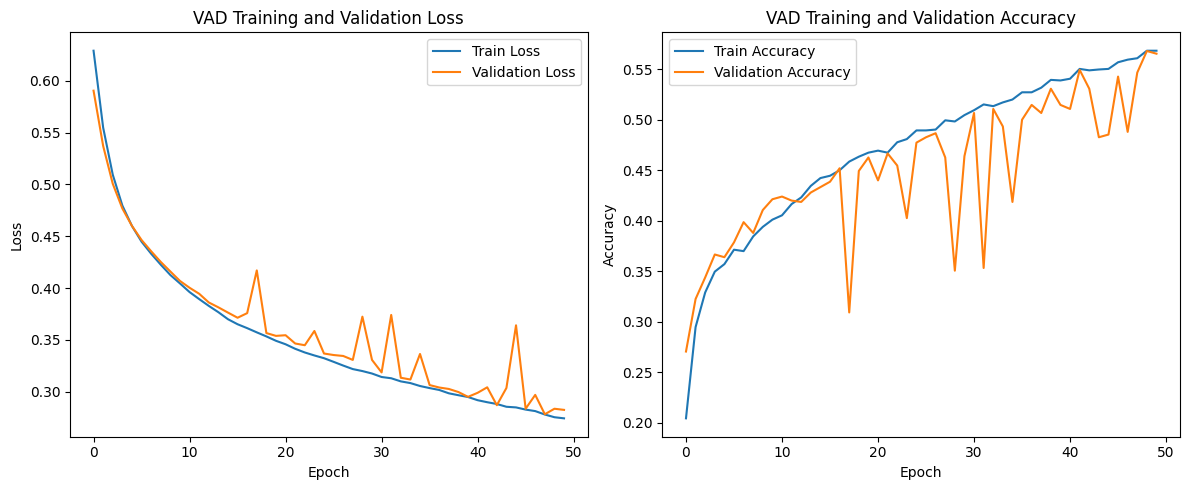

In [92]:
# TODO : Plot your training and validation loss and accuracy curves
# Plotting!
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tr_loss_ep, label='Train Loss')
plt.plot(val_loss_ep, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('VAD Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tr_acc_ep, label='Train Accuracy')
plt.plot(val_acc_ep, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('VAD Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



---



## 💯 Evaluation 💯
We'll quickly make some new model loading and eval functions for this task.

In [60]:
# TODO : Complete this function to load the trained model
def load_best_model_voice_detection(device):
    """
    Load the best saved model from the file system.

    Parameters:
        device (str): The device to load the model onto ('cuda' or 'cpu').

    Returns:
        model: The loaded model with trained weights.
    """
    model = CNNFrameClassifier(input_channels=1, num_out_frames=5)
    model.load_state_dict(torch.load(f"best_model_voice_detection.pth", map_location=device))
    model.to(device)
    model.eval()
    print(f"Loaded best model: best_model_detection.pth")
    return model


# TODO : Complete this method for evaluating your trained model
def eval_model_voice_detection(model, test_dataloader, device):
    """
    Test the loaded model on a test dataset.

    Parameters:
        model: The trained model to evaluate.
        test_dataloader (DataLoader): The dataloader for test data.
        device (str): The device to use for testing ('cuda' or 'cpu').

    Returns:
        results_dict (dict): Dictionary of average per-sample and exact match accuracies.
    """
    model.eval()
    total_correct = 0
    total_labels = 0
    total_exact_matches = 0
    total_samples = 0
    # This should have a scal
    results_dict = {'avg_per_sample_acc': 0,
                    'avg_exact_match_acc': 0}

    with torch.no_grad():
        for inputs, targets in tqdm(test_dataloader, desc="Testing Model"):
            # TODO : get the model output and calculate the evaluation metrics
            # Move data to device
            inputs, targets = inputs.to(device), targets.to(device)
            # Forward pass
            outputs = model(inputs)
            # Handle potential extra dimension
            if outputs.dim() > 2:
                outputs = outputs.squeeze(-1)
            # Get binary predictions (threshold at 0.5)
            predictions = (torch.sigmoid(outputs) > 0.5).float()

            # Calculate per-sample accuracy
            correct_predictions = (predictions == targets).float()
            total_correct += correct_predictions.sum().item()
            total_labels += targets.numel()

            # Calculate exact match accuracy
            exact_matches = torch.all(correct_predictions == 1, dim=1).float().sum().item()
            total_exact_matches += exact_matches
            total_samples += inputs.size(0)
    # Calculate average metrics
    avg_per_sample_acc = total_correct / total_labels
    avg_exact_match_acc = total_exact_matches / total_samples
    # Store results
    results_dict = {
        'avg_per_sample_acc': avg_per_sample_acc,
        'avg_exact_match_acc': avg_exact_match_acc
    }
    print(f"Test Per-Sample Accuracy: {avg_per_sample_acc:.4f}")
    print(f"Test Exact Match Accuracy: {avg_exact_match_acc:.4f}")


    return results_dict


In [93]:
# TODO : Run this cell to evaluate your CNN on the test dataset
trained_model_cnn = load_best_model_voice_detection(device)
trained_model_cnn.eval()
results_cnn = eval_model_voice_detection(trained_model_cnn, test_dataloader, device)

Loaded best model: best_model_detection.pth


Testing Model: 100%|██████████| 24/24 [00:11<00:00,  2.06it/s]

Test Per-Sample Accuracy: 0.8808
Test Exact Match Accuracy: 0.5320




---



## ⚠️ **TODO Written Questions - Voice Detection:** ⚠️
1. Explain which activation function you used in the voice detection model at evaluation time to get the final output labels. Is this different from what was used in Part 1 for sound event classification?

  **Answer:** For voice detection, we used the sigmoid activation function to convert our model's output logits into probabilities between 0 and 1. Since each frame required a binary decision (speech present or not), we applied a threshold of 0.5 to these probabilities to get final binary predictions. <br>
  This differs from the ESC-50 sound classification task, where we used softmax activation to handle the 50 mutually exclusive classes, followed by an argmax operation to select the most likely sound class. The key difference is that voice detection is a multi-label binary classification problem (each frame independently classified), while ESC-50 was a multi-class problem (one class per audio clip).
2. Here we used a Conv2D for this task that has frame-wise output. Is there a way we could use an MLP to get frame-wise predictions?

  **Answer:** Yes, an MLP could be adapted for frame-wise predictions through a few approaches:

  - We could segment the spectrogram into 5 equal time chunks and flatten each segment separately, feeding each through the same MLP to get 5 independent predictions.
  - Alternatively, we could use a fully connected layer with 5 output neurons, where each neuron specializes in predicting voice activity for a specific time frame. The challenge would be ensuring each neuron focuses on the relevant portion of the input.
  - We could also use a sliding window approach, where an MLP processes overlapping chunks of the spectrogram to make decisions about each frame.




---



## Bonus (1pt): data augmentation
For either parts of the lab (sound classification or voice detection), experiment with **data augmentation** during training. This will require enhancing your dataloader and providing an option to augment the data in some of the ways we discussed in class. Update the dataloader and re-train+evaluate one of the models using data augmentation. Report here what you updated and the affect you saw on model performance.



---



Code authored by Julia Wilkins, with some points adapted from [Deep Learning](https://github.com/interactiveaudiolab/course-deep-learning/blob/main/notebooks/notebook_2_nn.ipynb) at Northwestern University with Bryan Pardo.